In [553]:
%matplotlib inline
%env CUDA_VISIBLE_DEVICES = 1

env: CUDA_VISIBLE_DEVICES=1


In [647]:
%run mylibrary.ipynb

env: CUDA_VISIBLE_DEVICES=1


In [604]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import math
import random

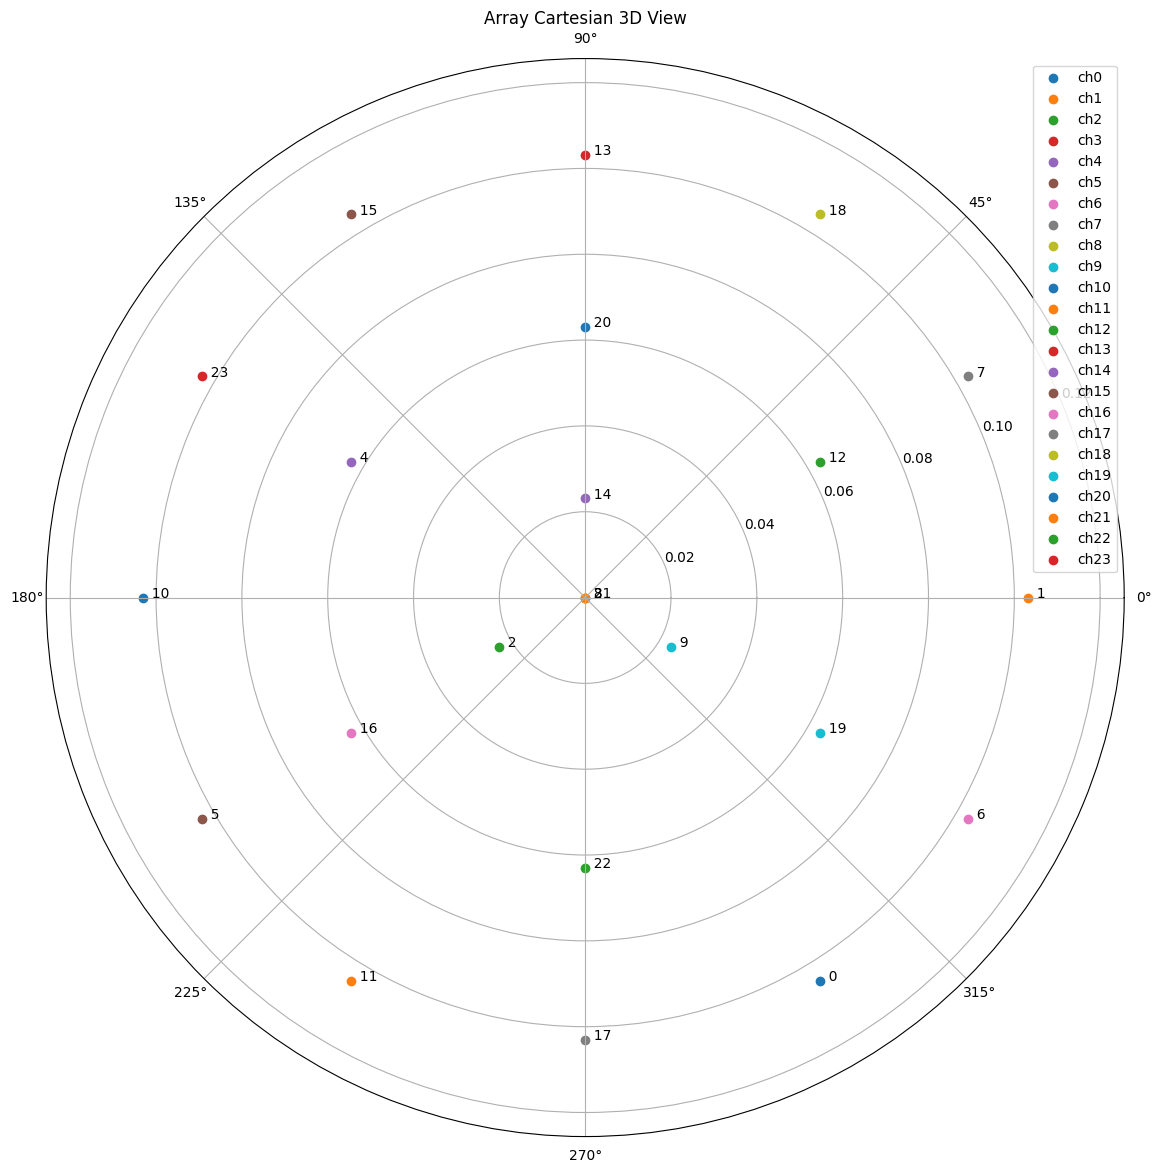

In [605]:
geometry = pd.read_csv('../AA_geometry.tsv', header=None, sep='\t')
AA_Geometry = geometry.to_numpy()
visualizer = Visualizer(AA_Geometry)
visualizer.polar()

In [606]:
class MyModel(tf.keras.Model):
    # Todo
    # Include: batch normalization
    def __init__(self, n_channels):
        super().__init__()
        self.net = tf.keras.Sequential([
            tf.keras.layers.Input(n_channels),
            tf.keras.layers.Dense(units=16, activation='relu'),
            tf.keras.layers.Dense(units=8, activation='relu'),
            tf.keras.layers.Dense(units=1, activation = 'linear')
        ])

    def call(self, inputs):
        return self.net(inputs)

In [607]:
def genRandomAA(num_channels, list_length):
    list_channels = np.empty([list_length, num_channels], dtype=int)
    for i in range(list_length):
        list_channels[i] = random.sample(range(0,24), num_channels)
    return list_channels

In [608]:
# Extract data from files
data = DataExtract("../data/rss45/", 24)
inputs = data.get_delays()
labels = data.get_angles()

['random_signal_source_info_0.dat', 'random_signal_source_info_1.dat', 'random_signal_source_info_2.dat', 'random_signal_source_info_3.dat', 'random_signal_source_info_4.dat']
['random_signal_source_info_0_tau.bin', 'random_signal_source_info_1_tau.bin', 'random_signal_source_info_2_tau.bin', 'random_signal_source_info_3_tau.bin', 'random_signal_source_info_4_tau.bin']


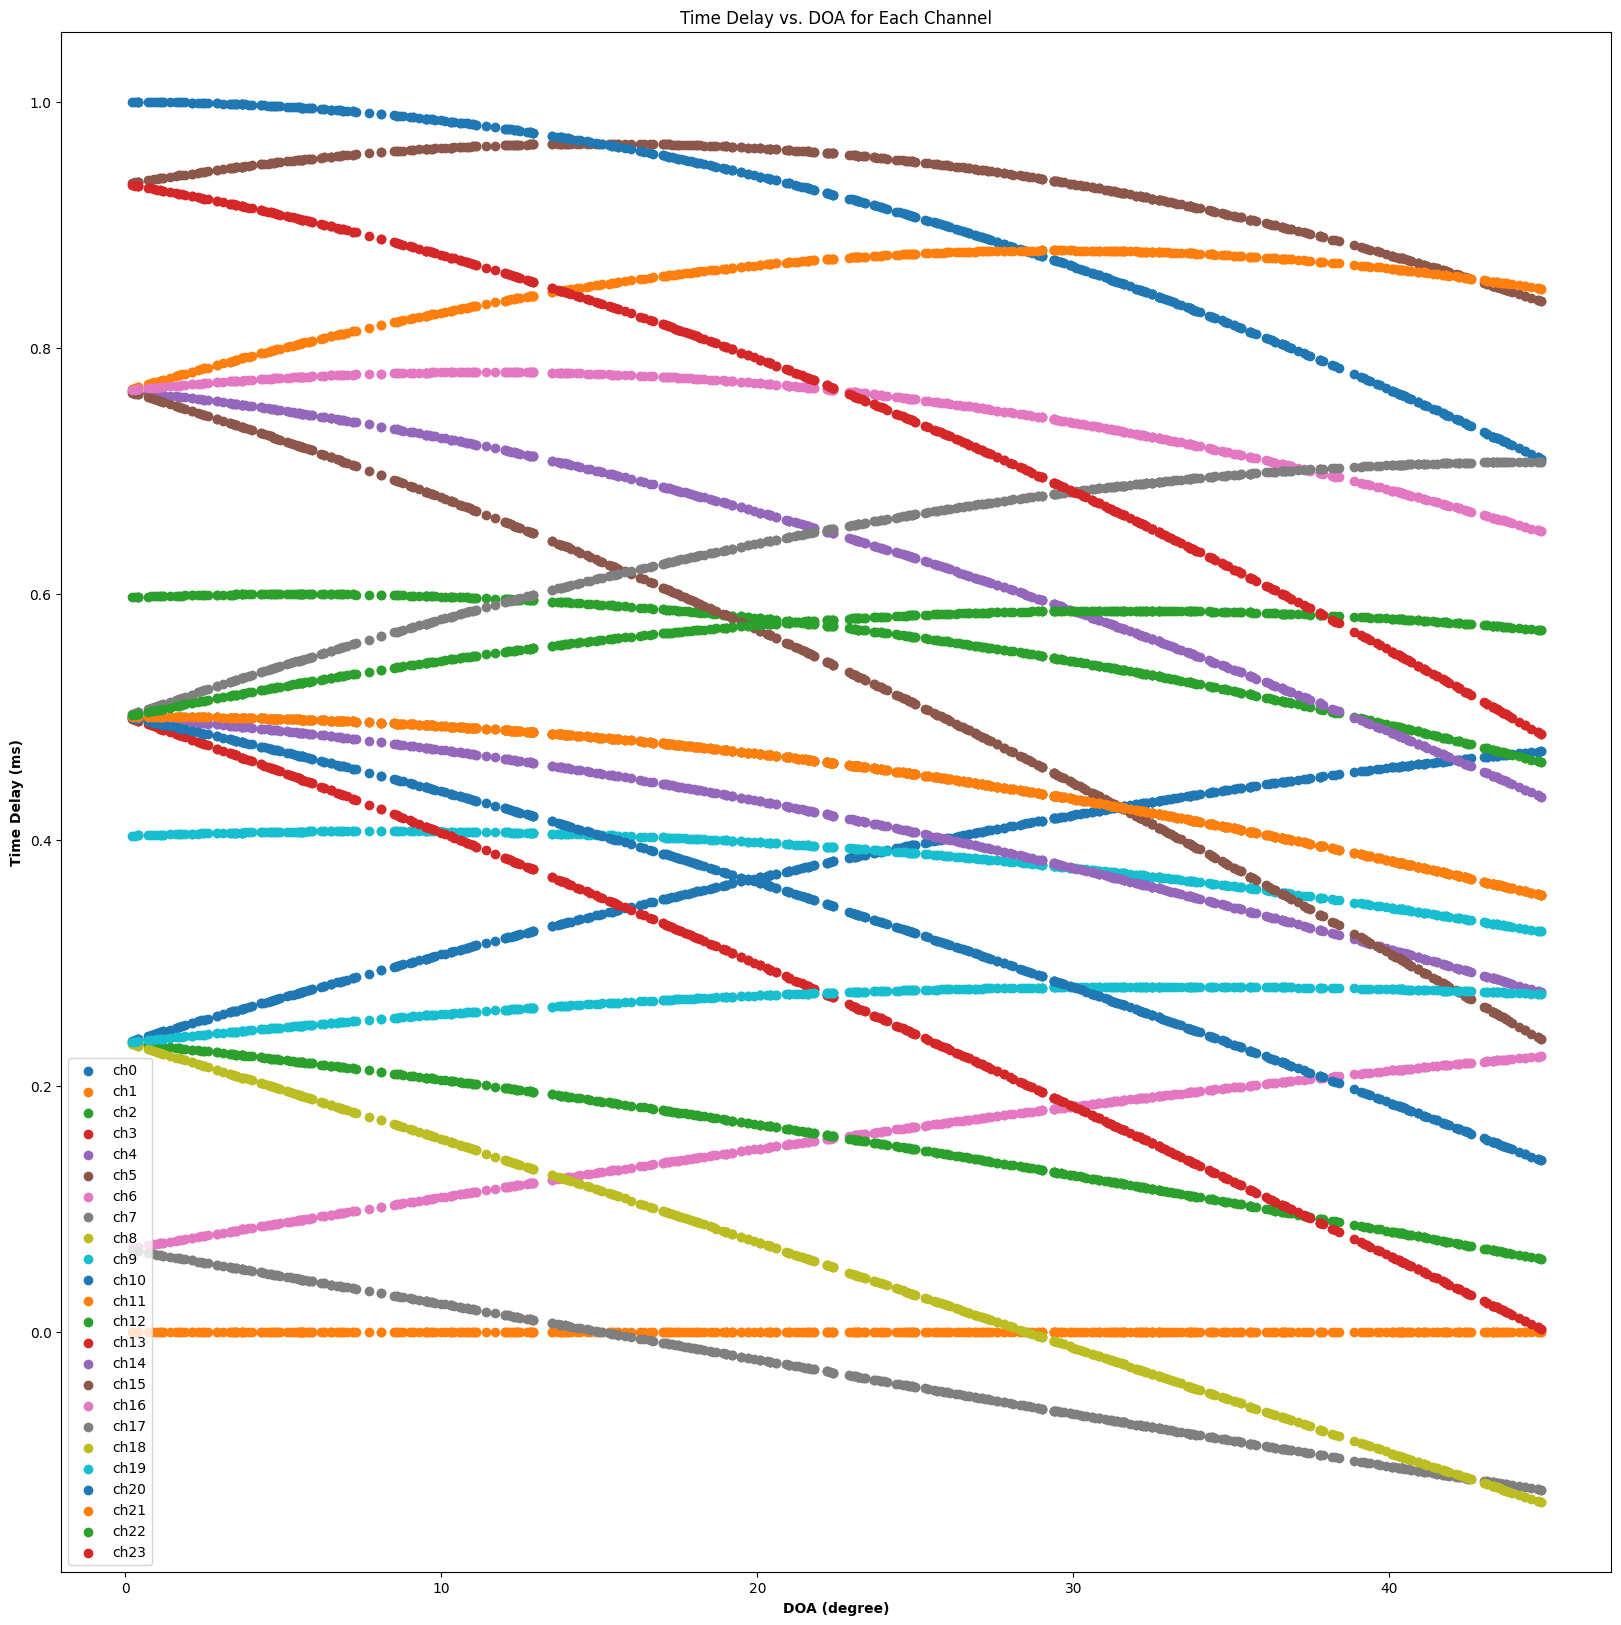

In [609]:
dataset = DataSetPacker(inputs, labels)
dataset.plot()

In [672]:
list_channels = genRandomAA(4,10)

[0.21038608253002167, 0.21038608253002167, 0.33730438351631165]
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
[0.01806546002626419, 0.01806546002626419, 0.10586775839328766]
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
[58.172428131103516, 58.172428131103516, 6.691407680511475]
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
[0.052113890647888184, 0.052113890647888184, 0.19350574910640717]
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━

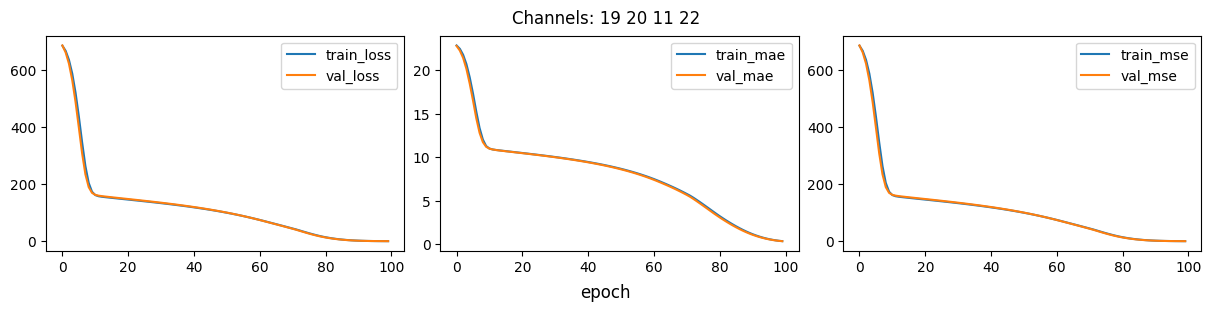

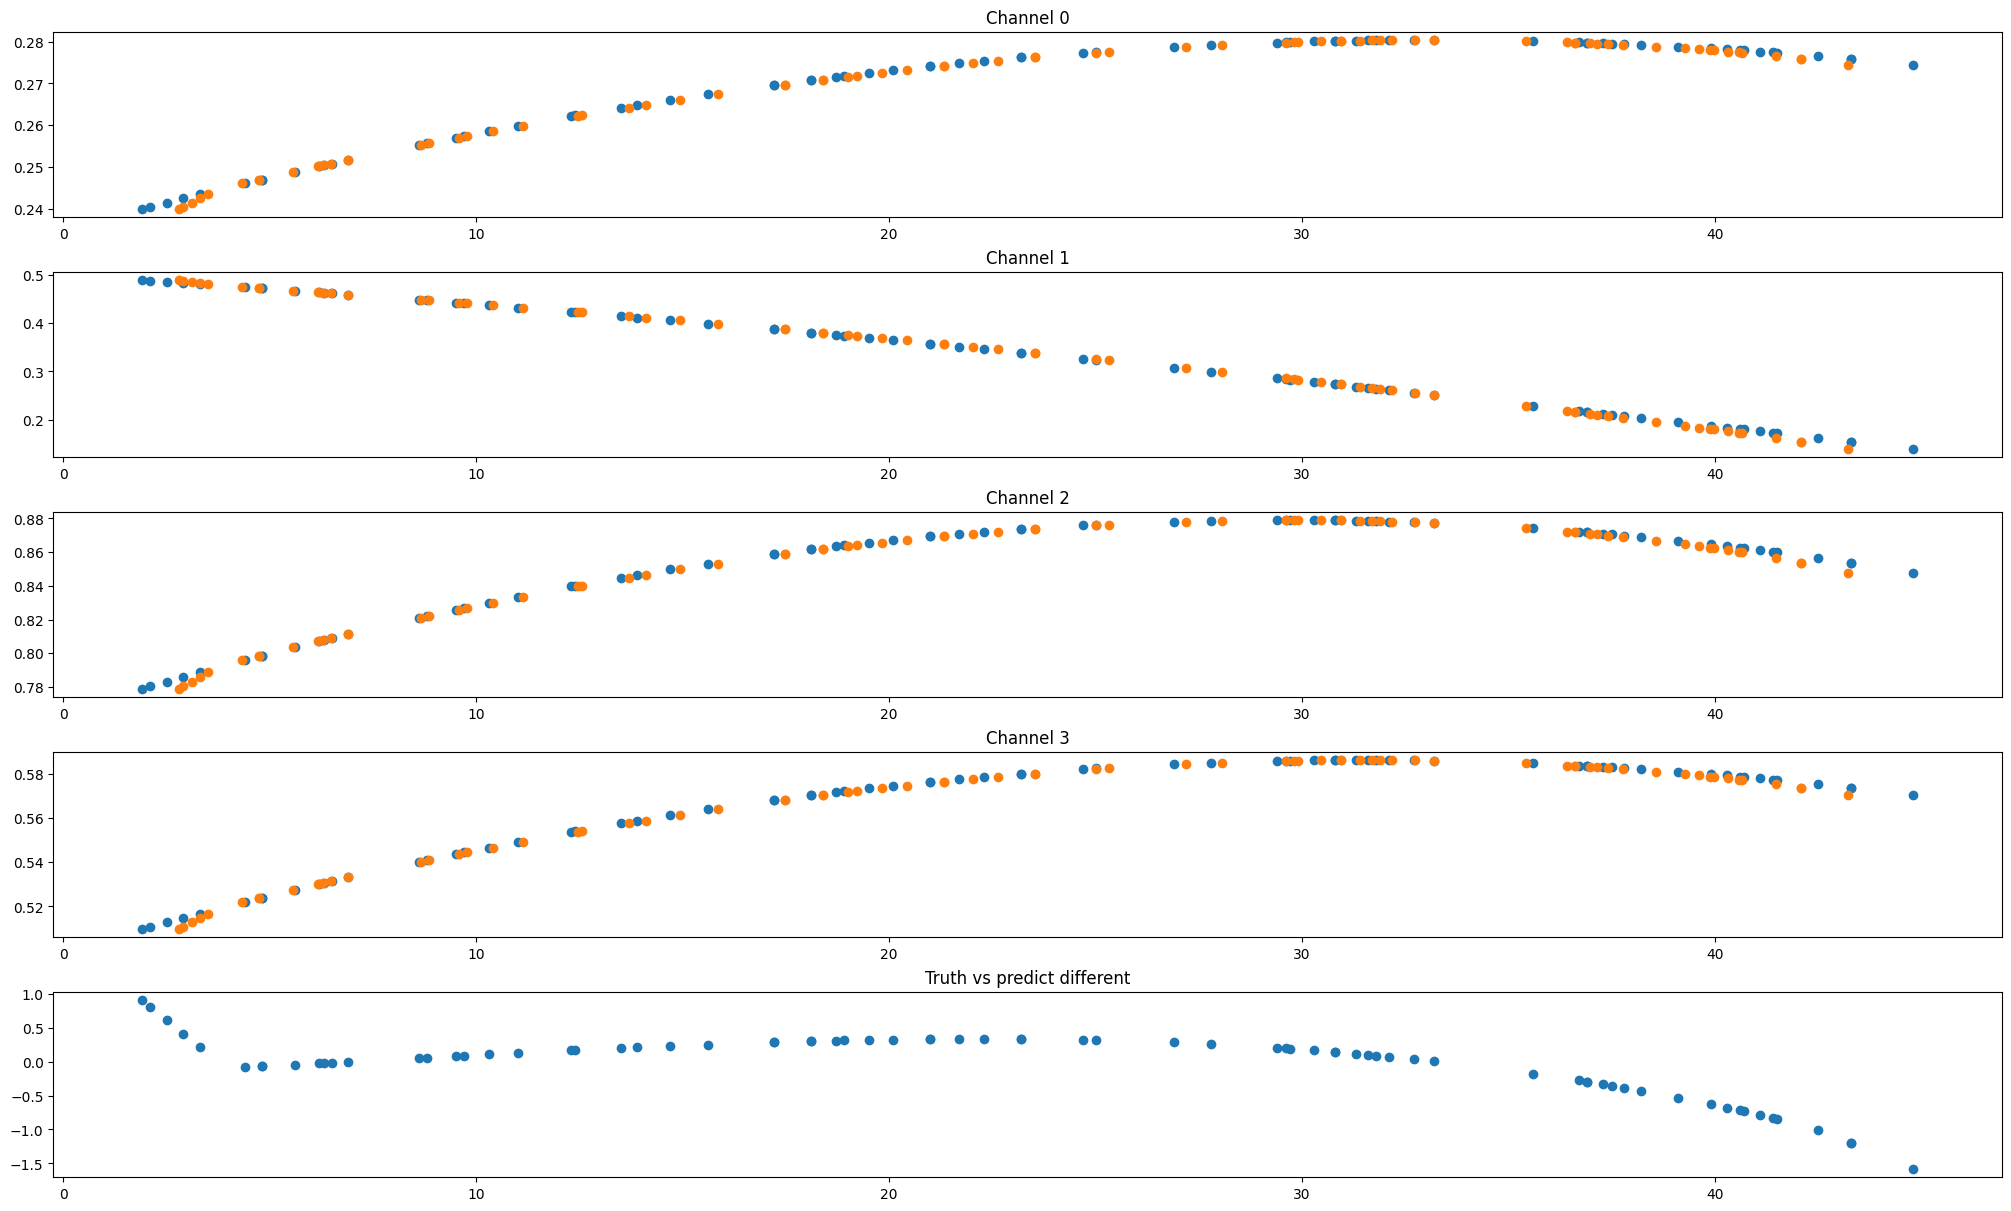

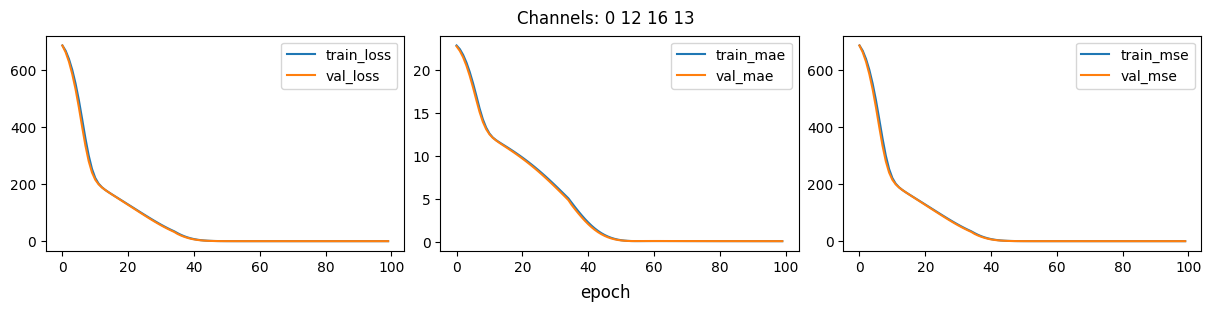

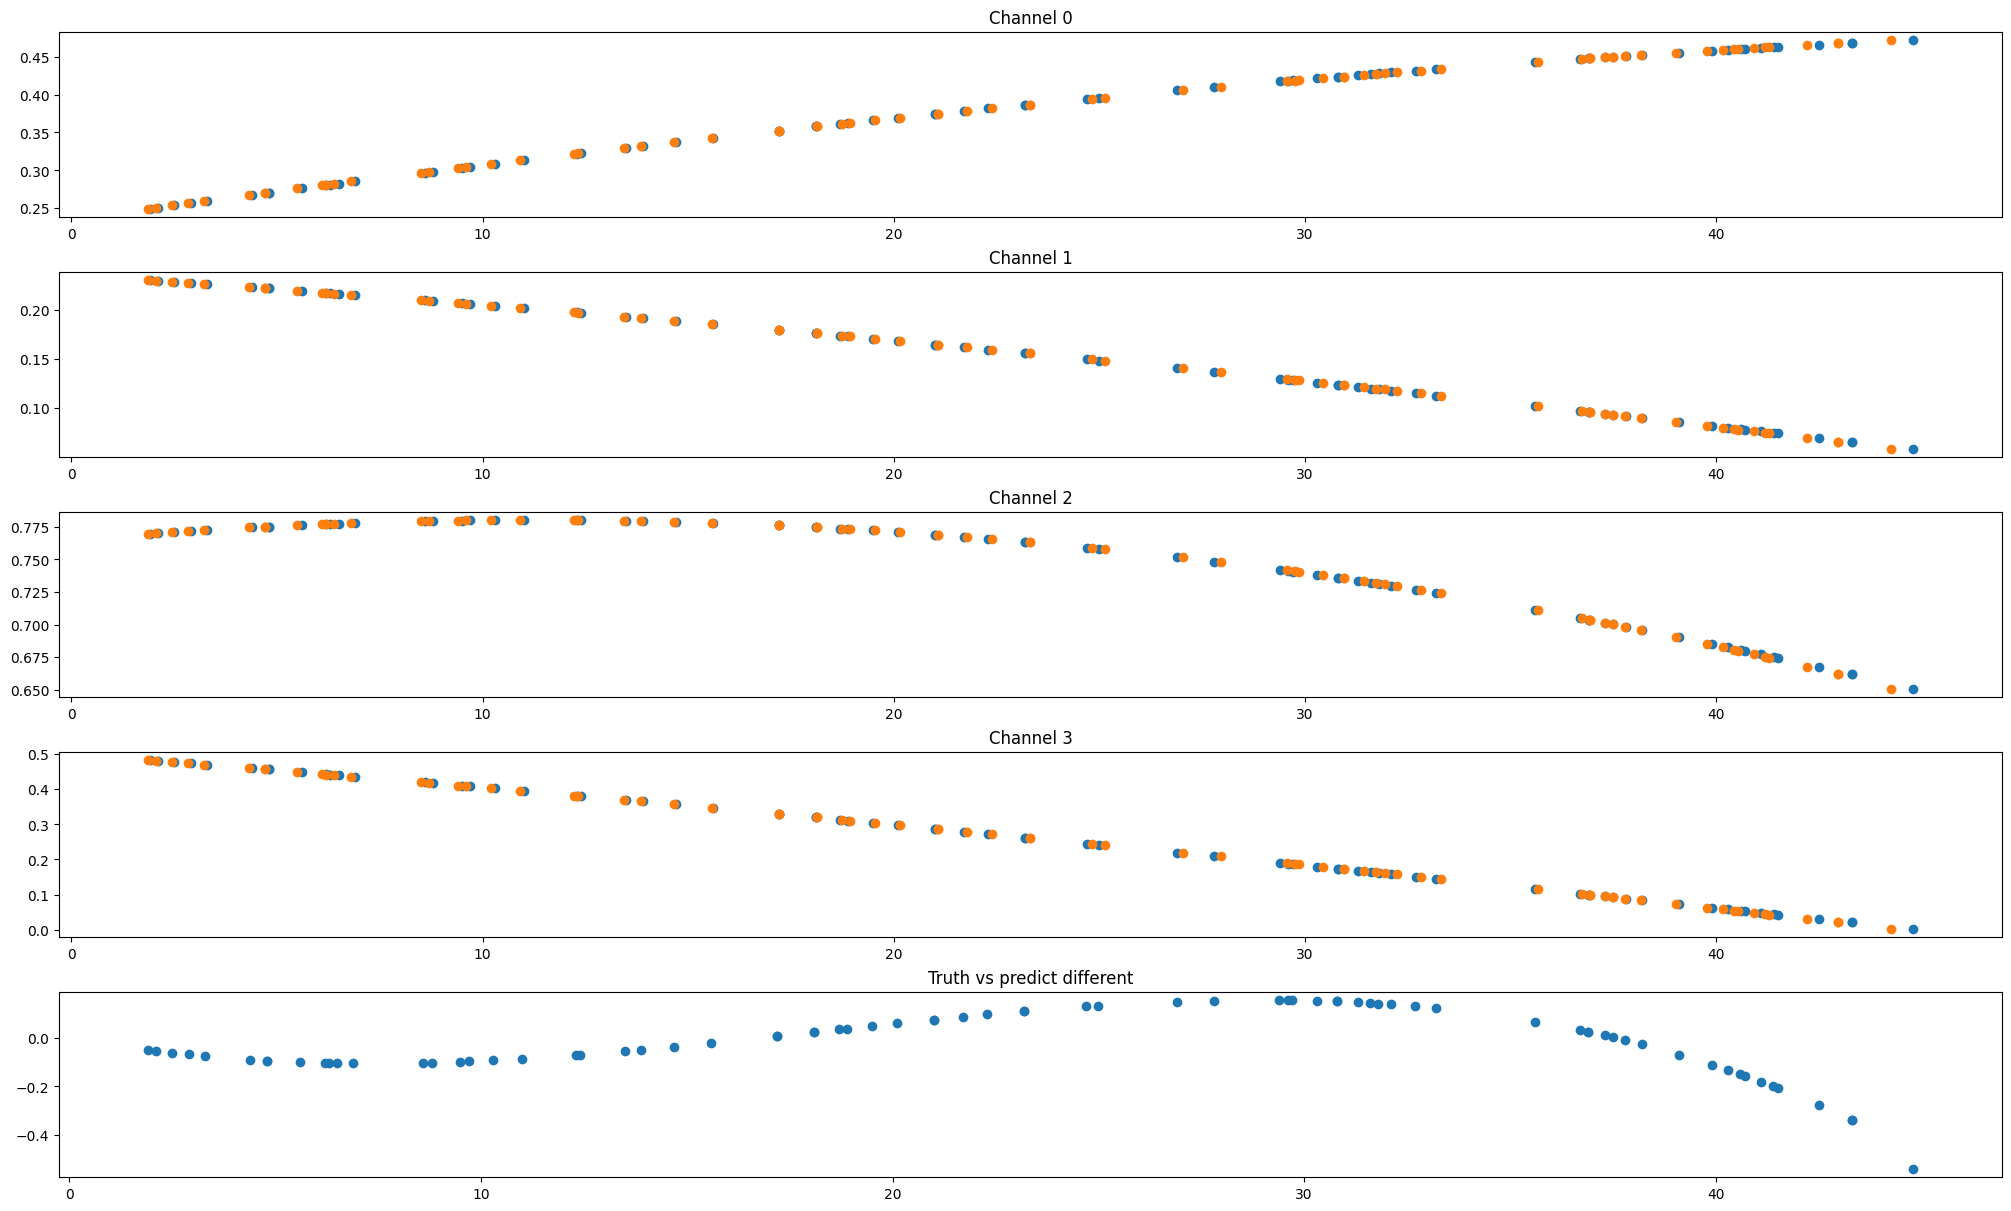

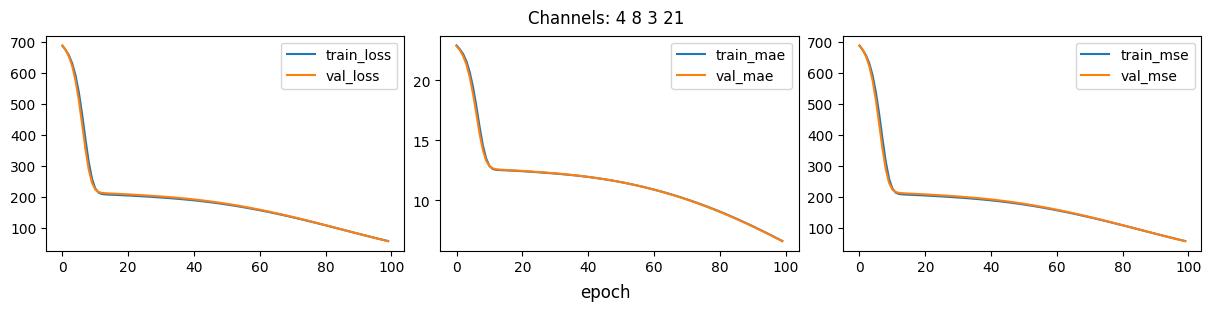

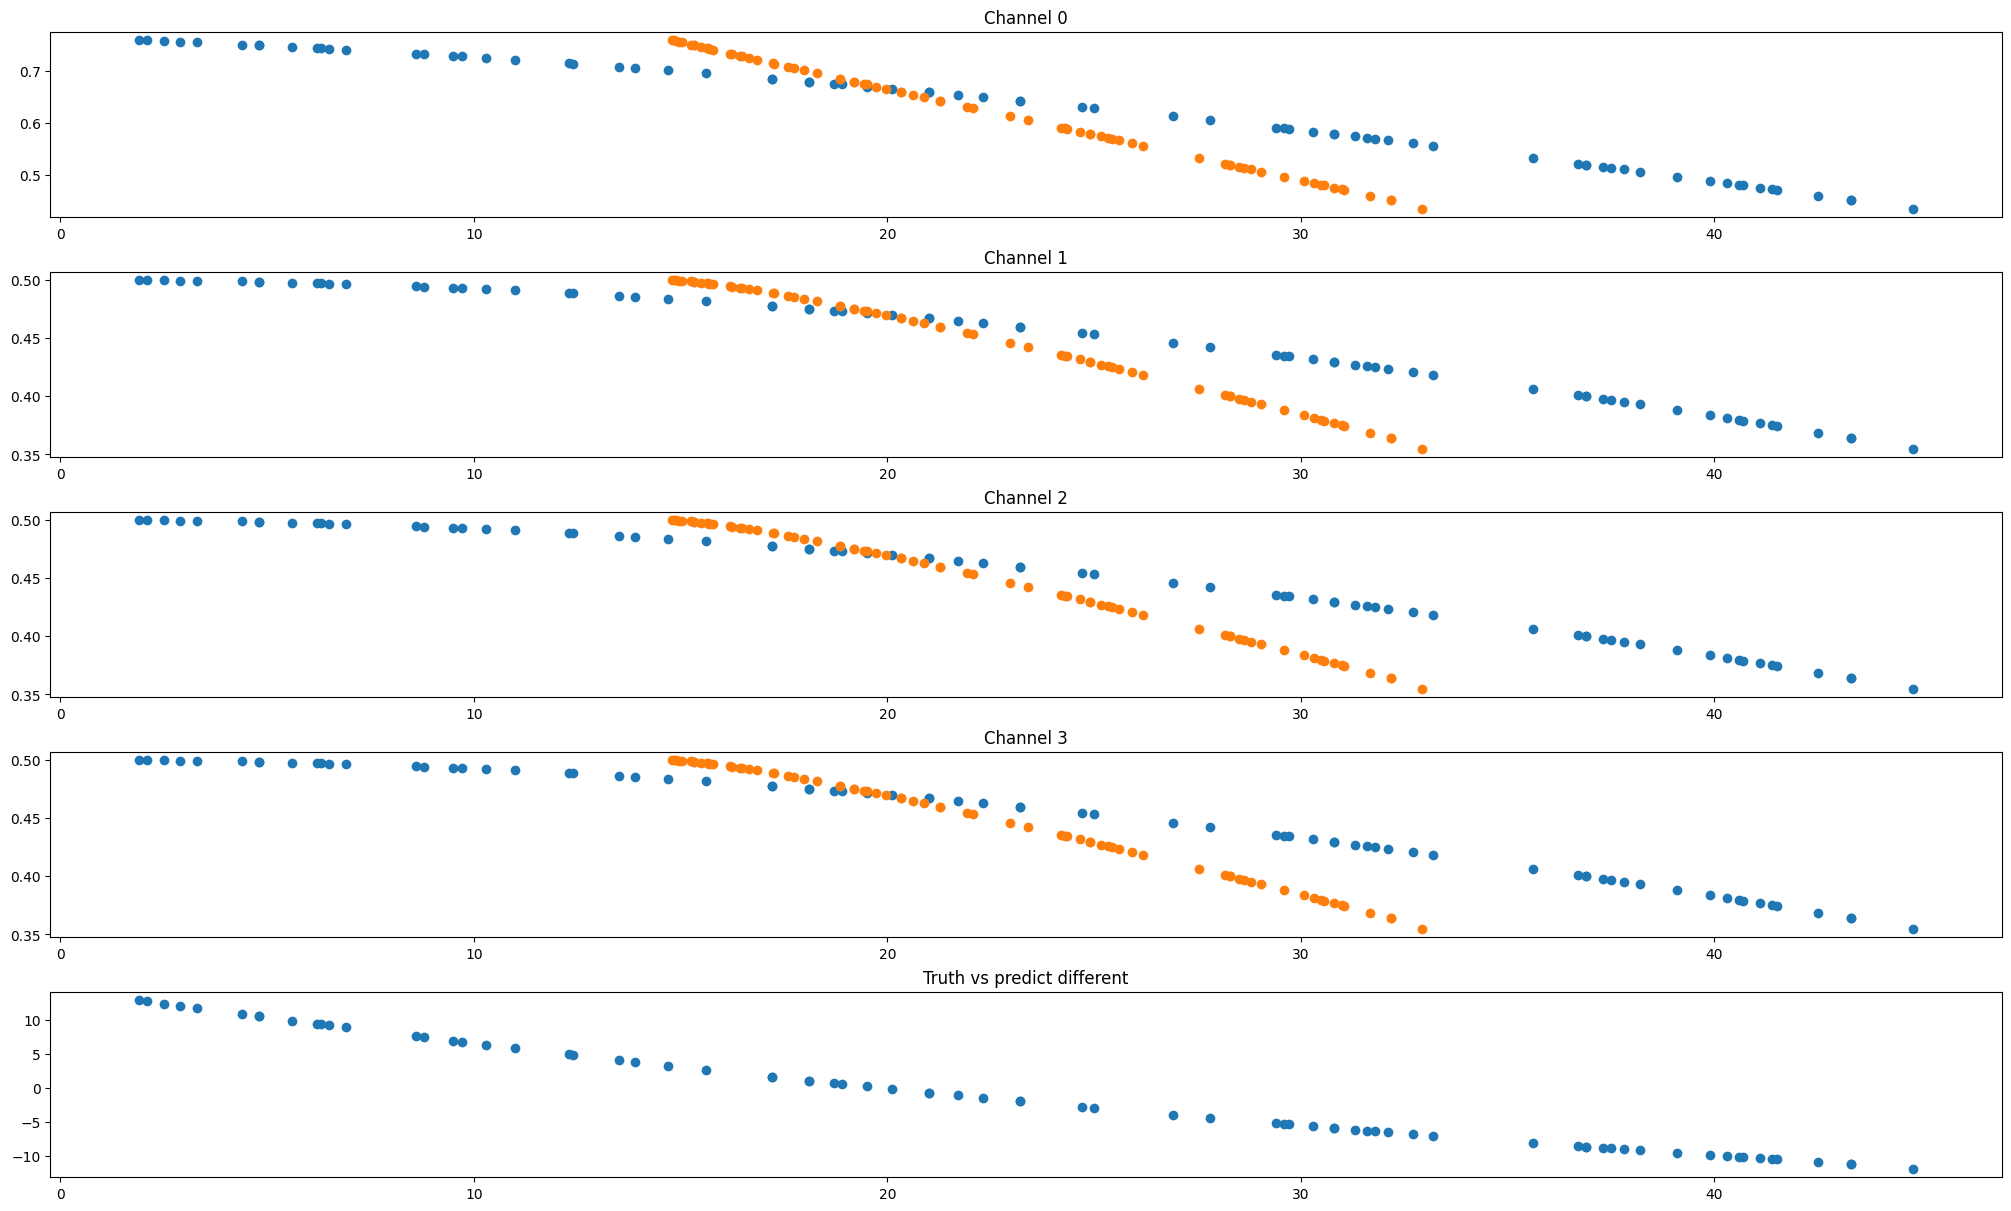

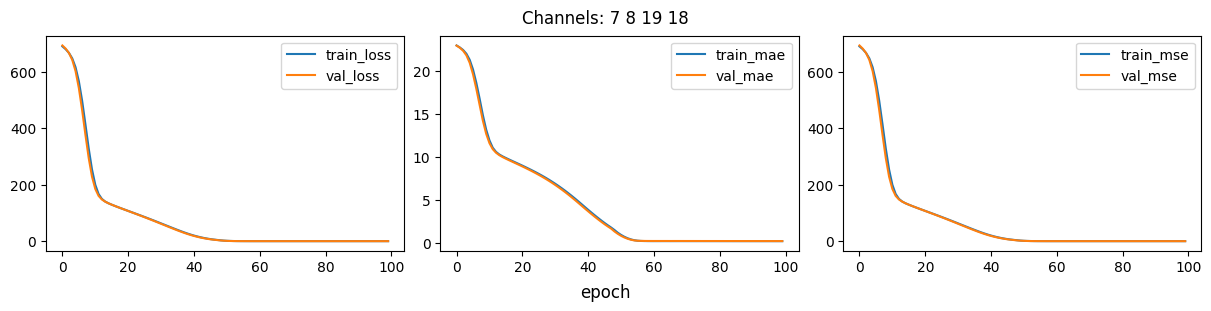

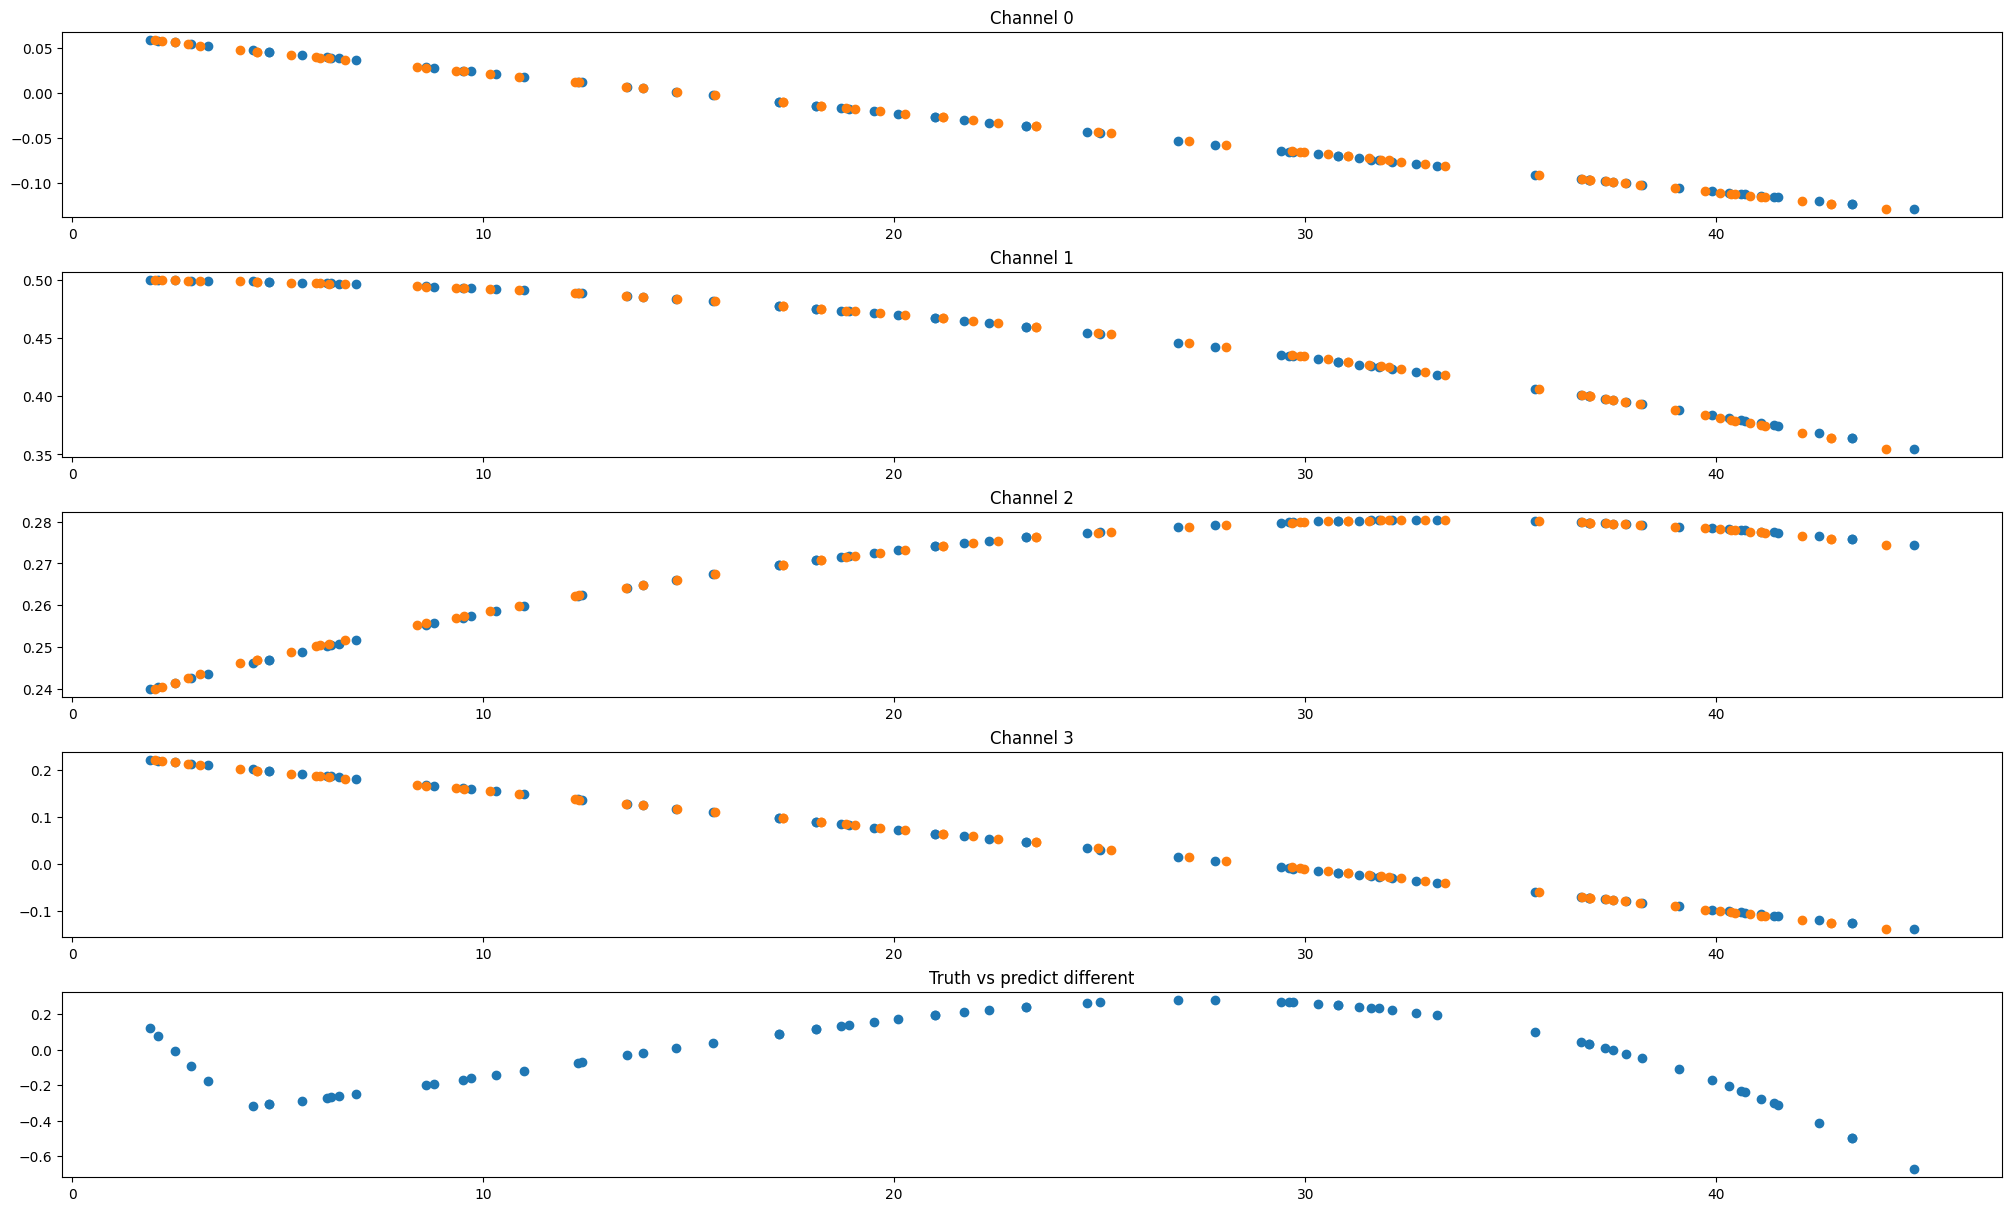

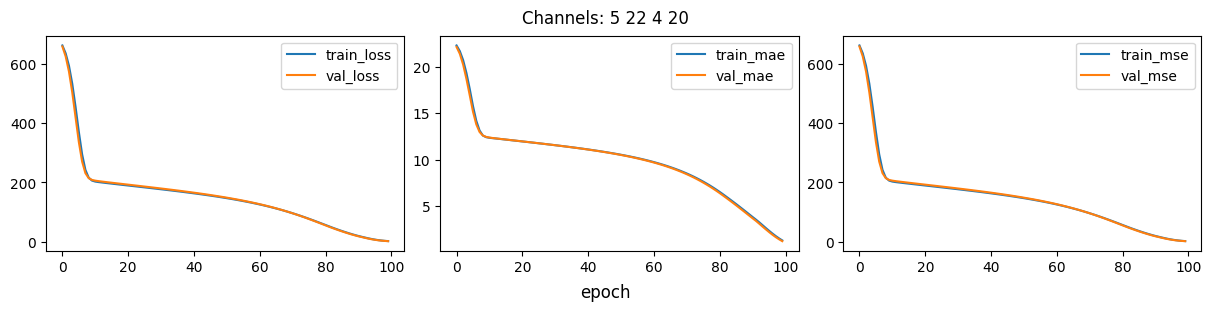

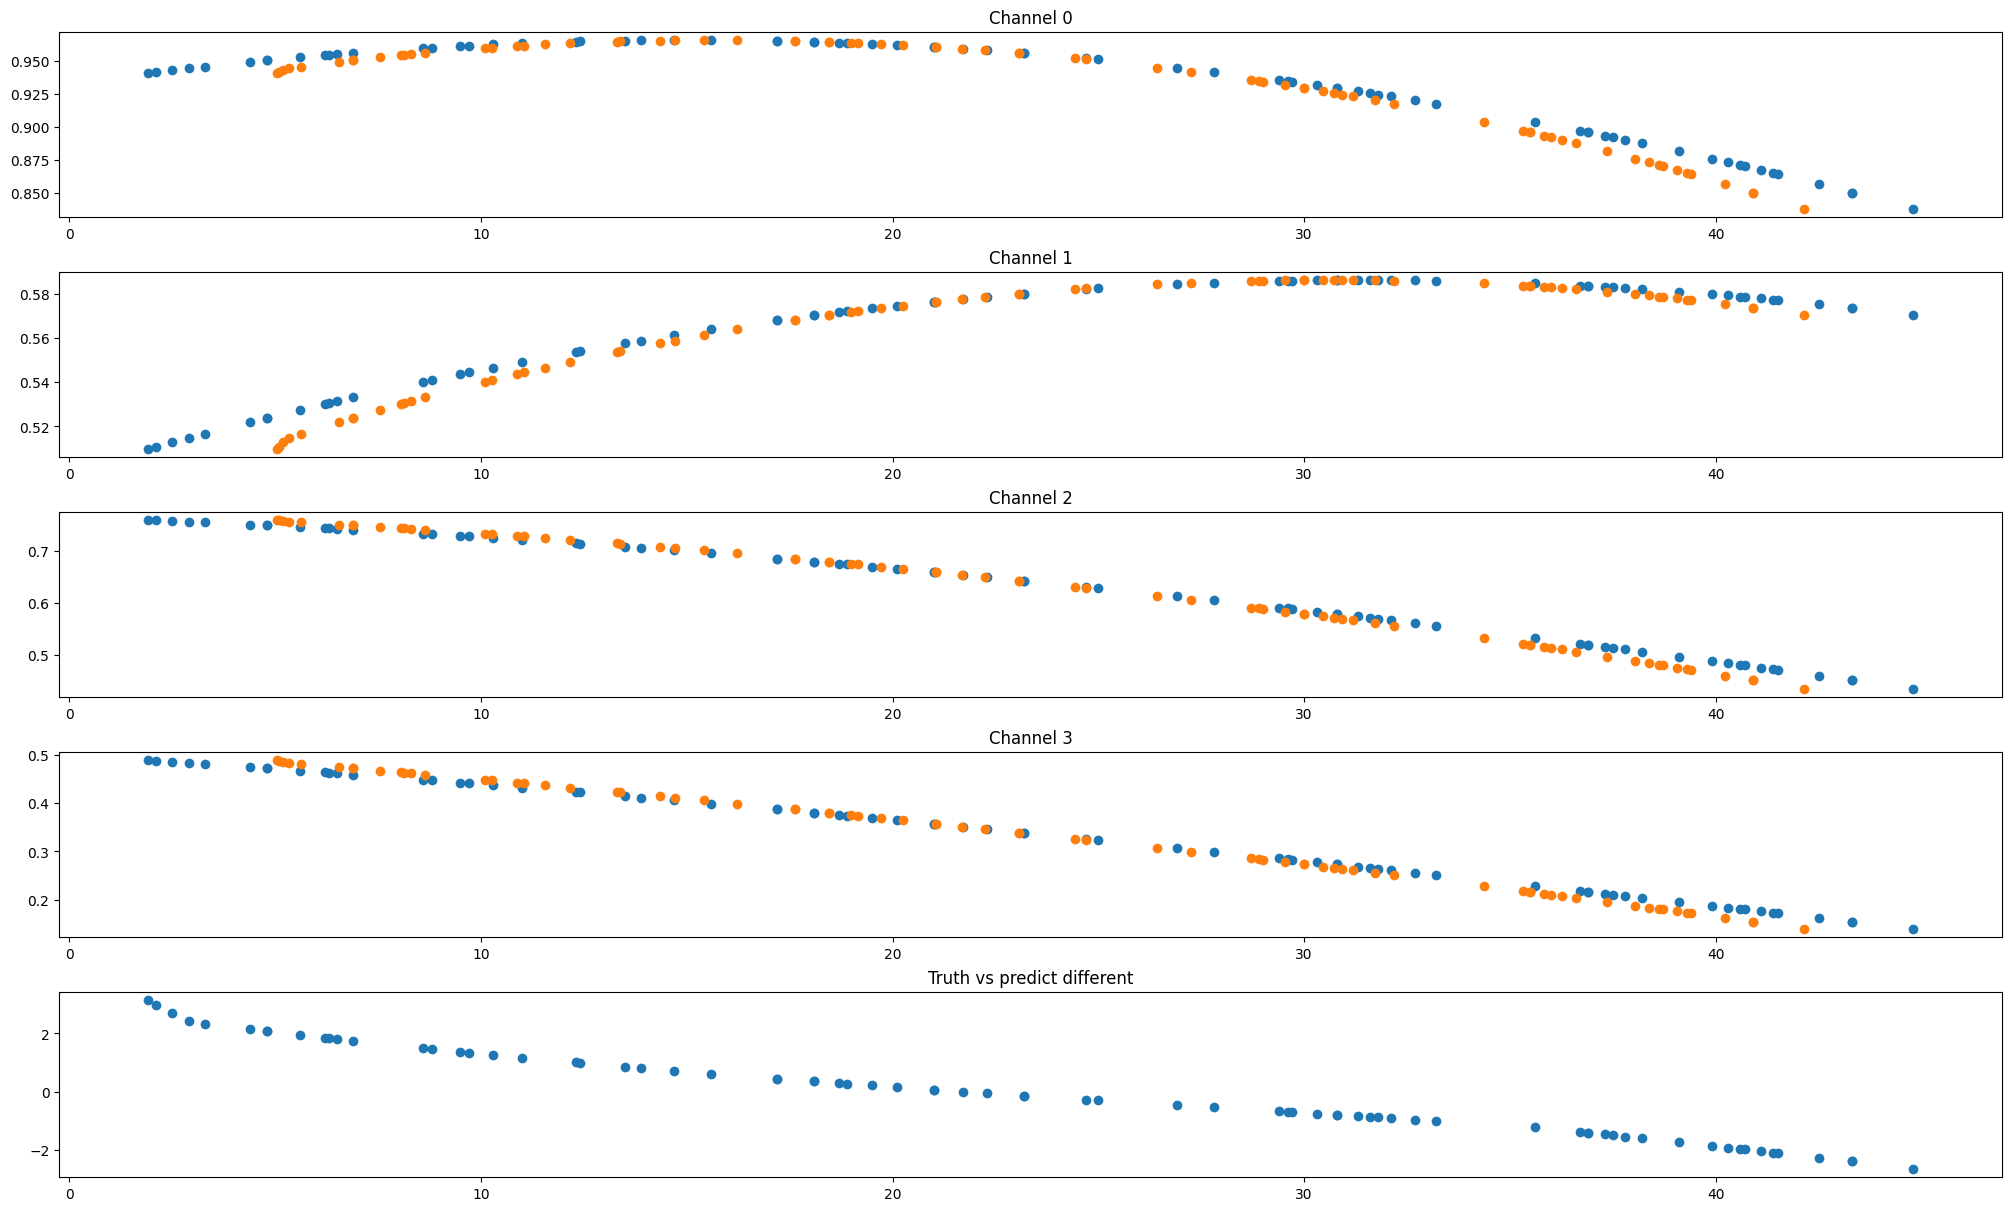

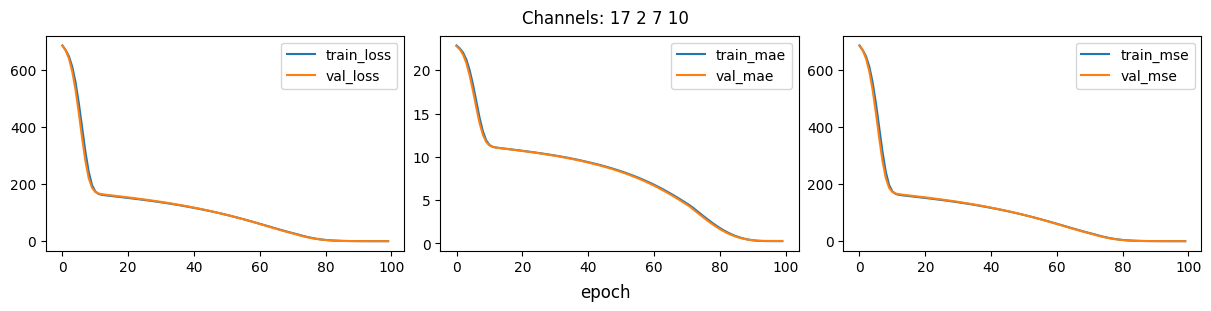

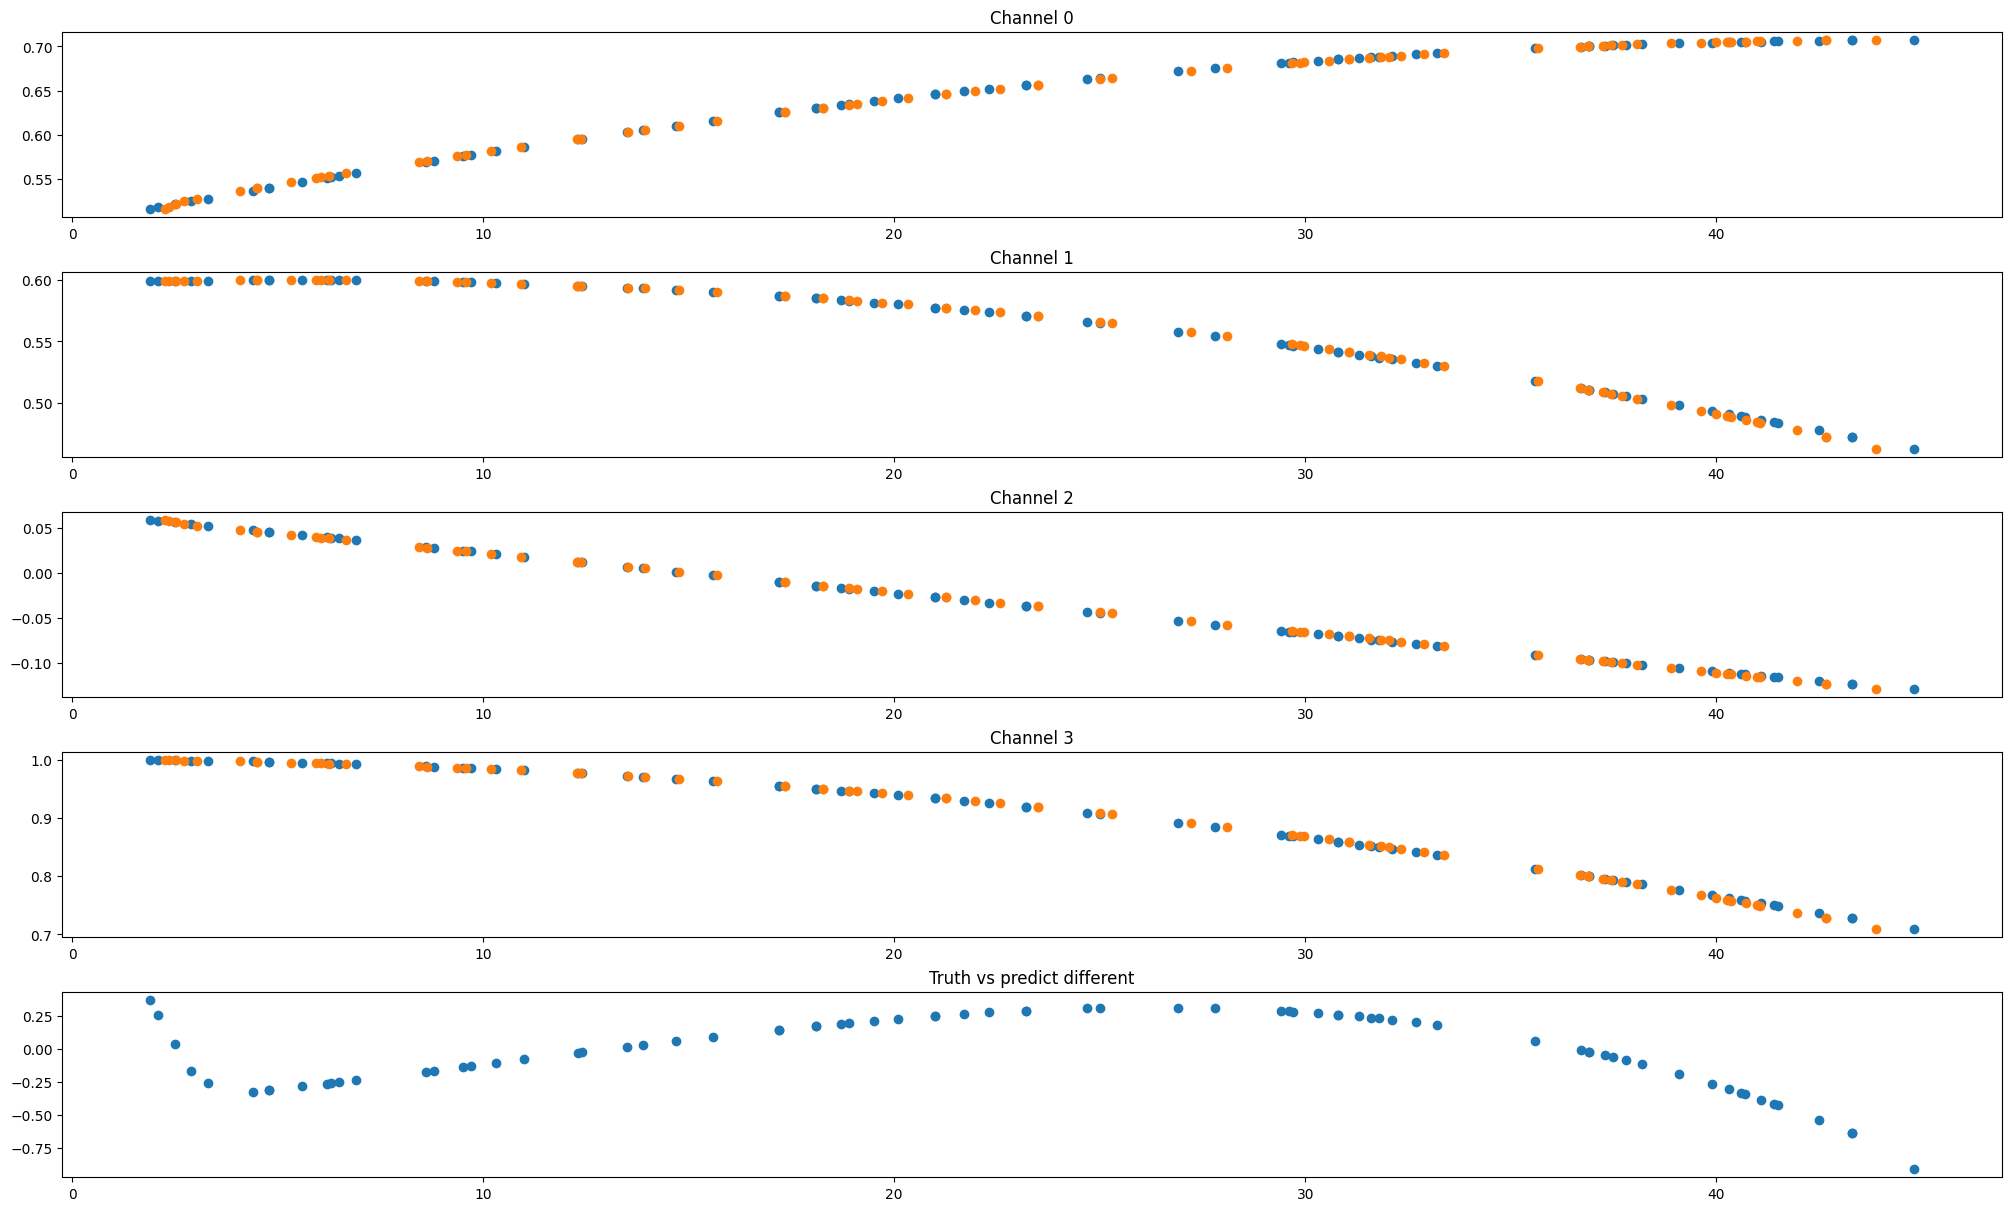

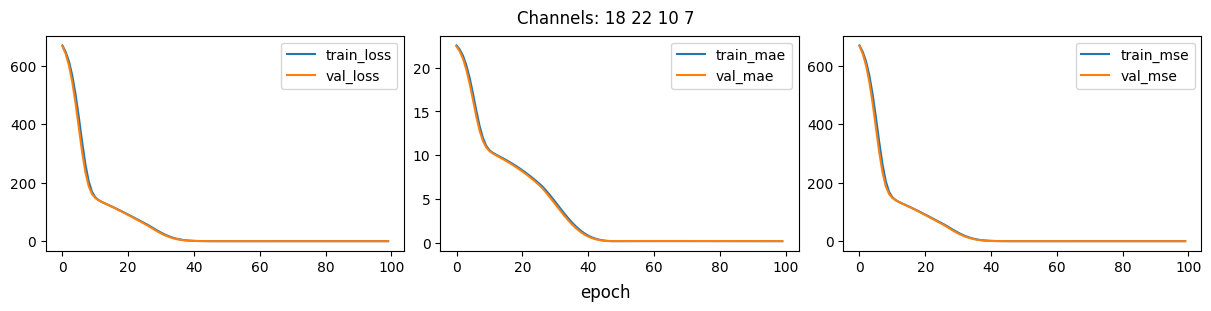

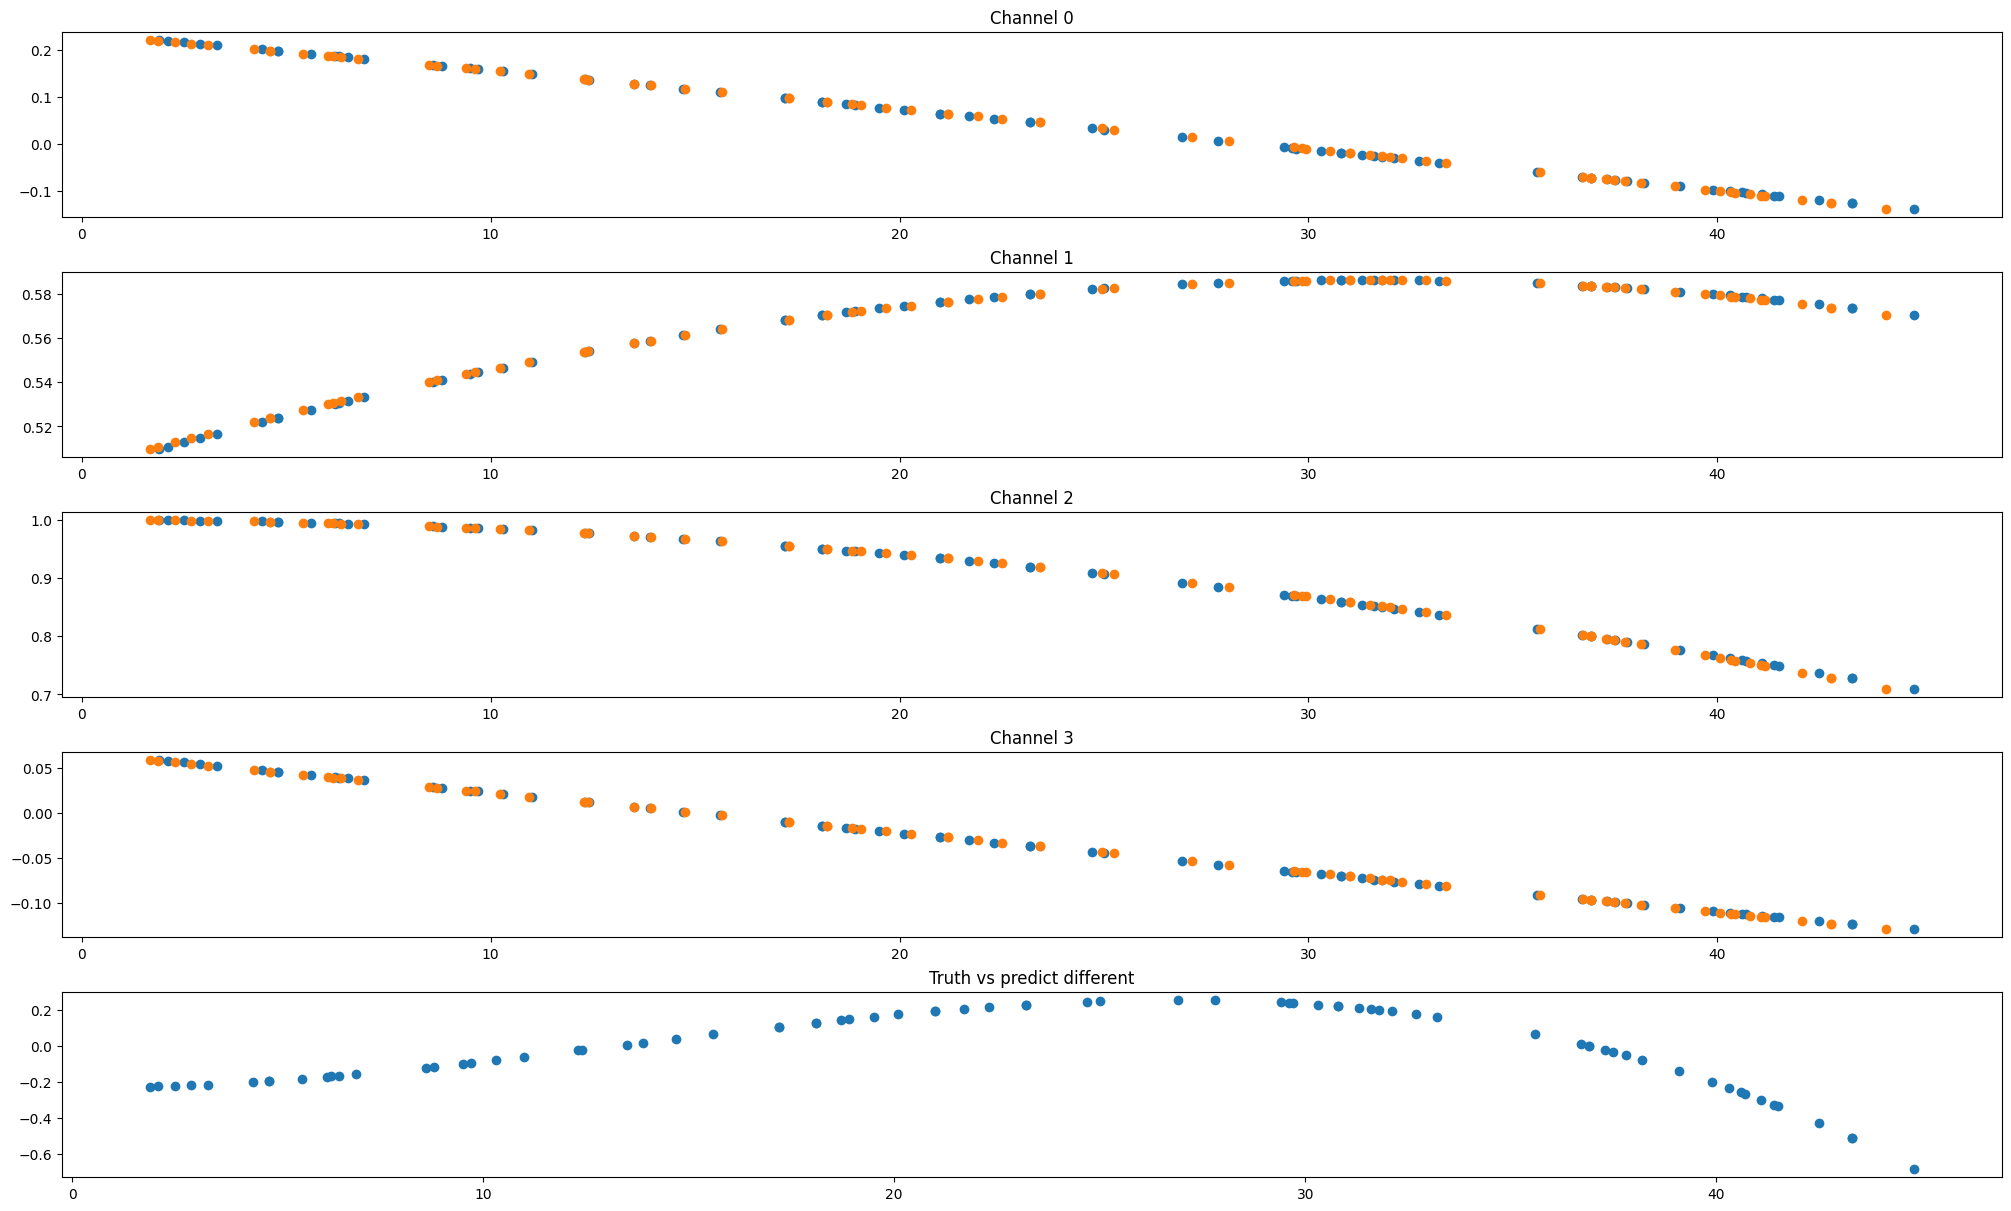

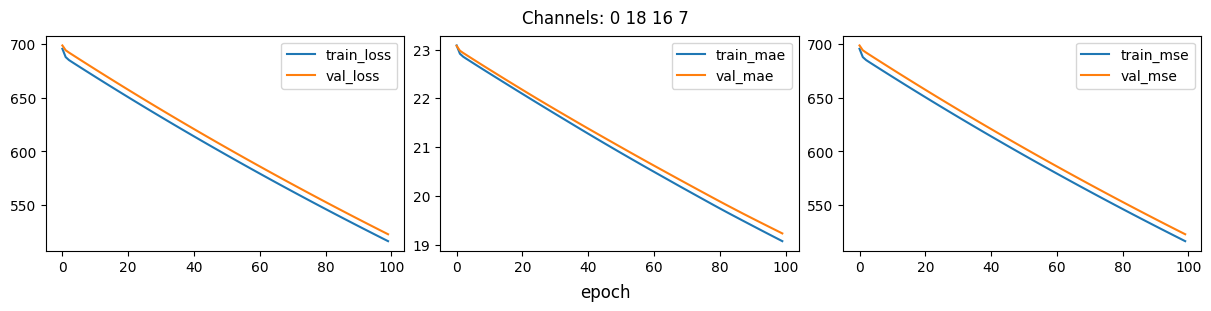

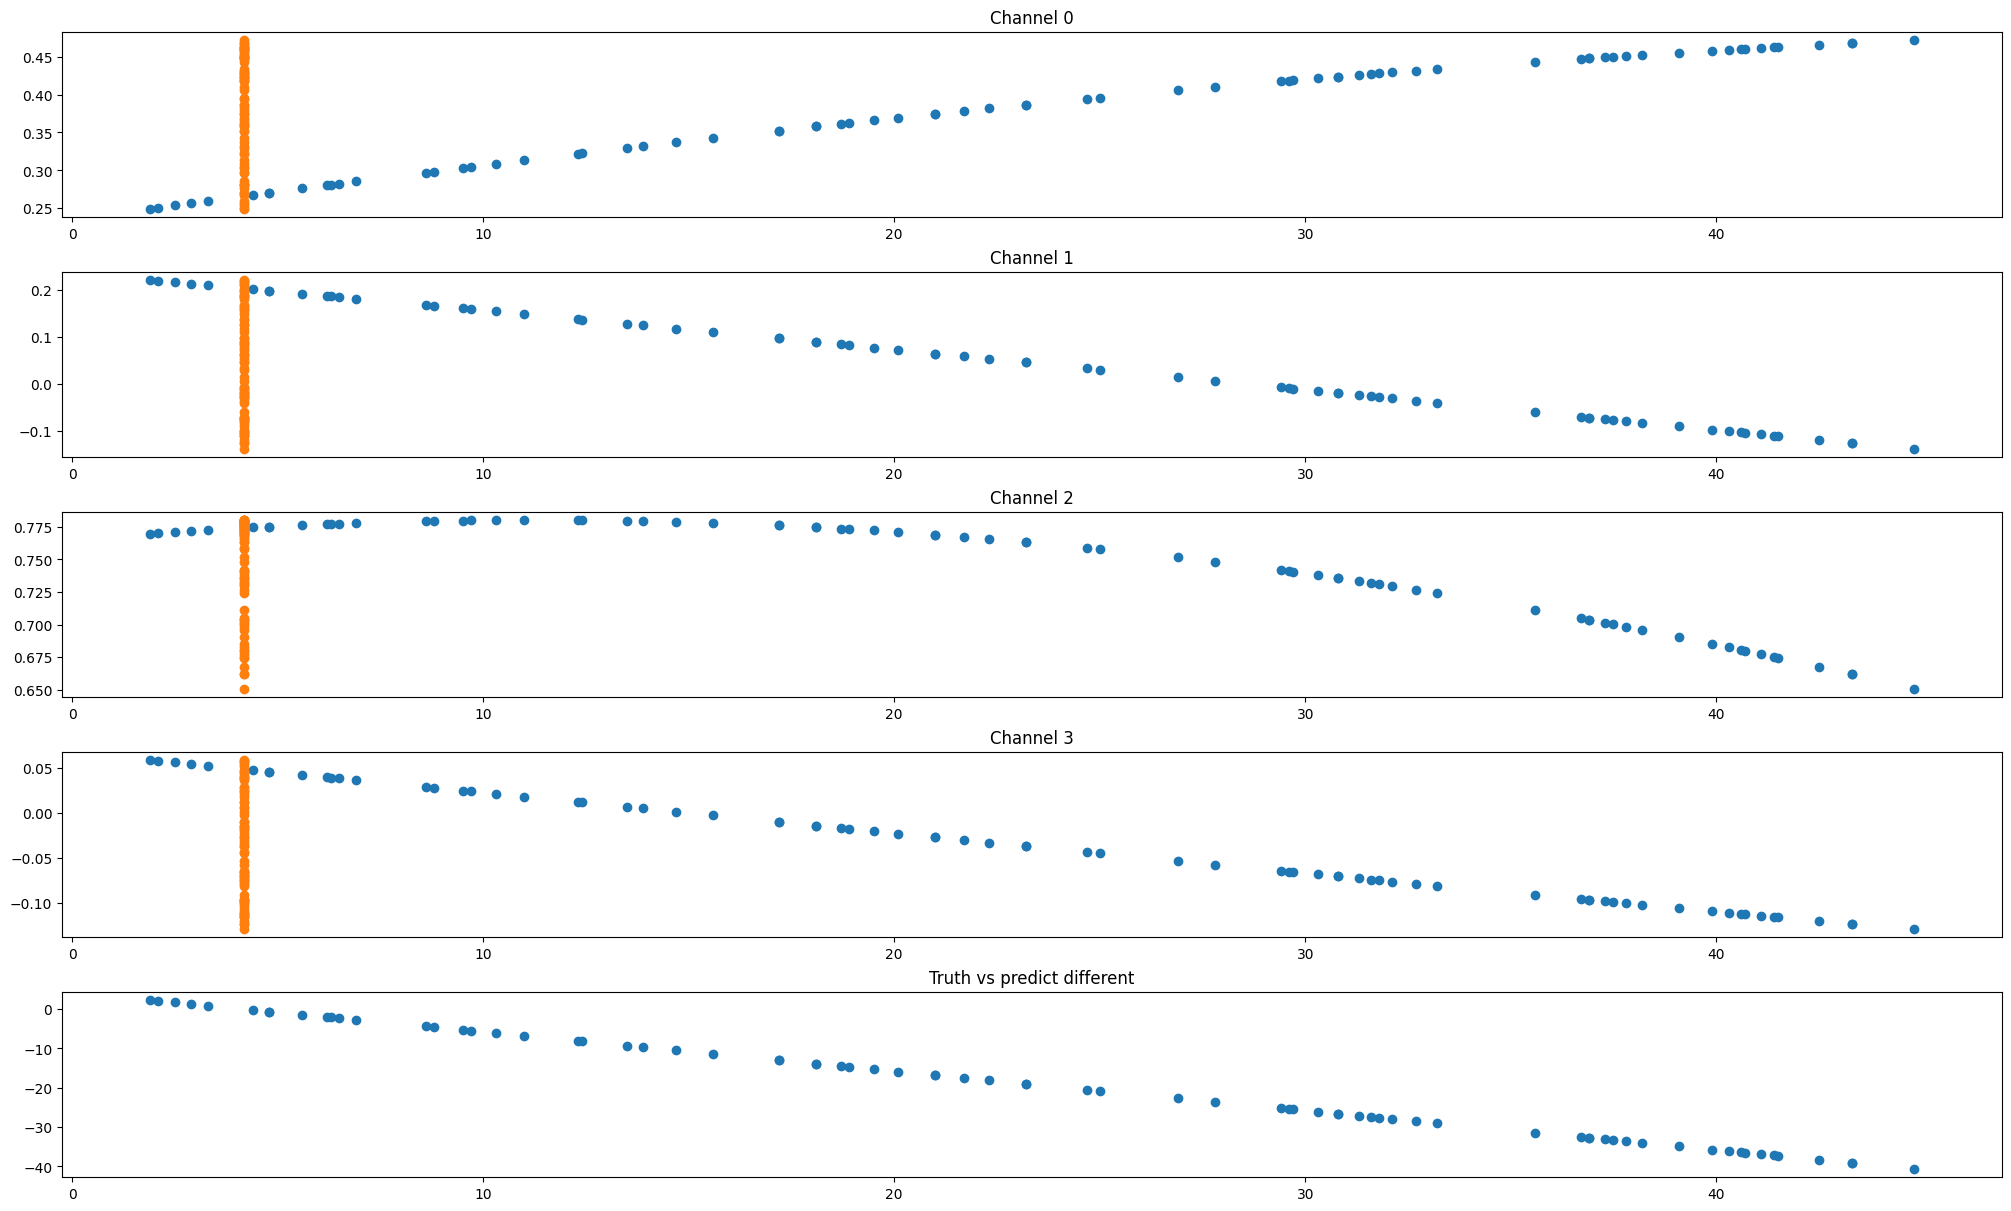

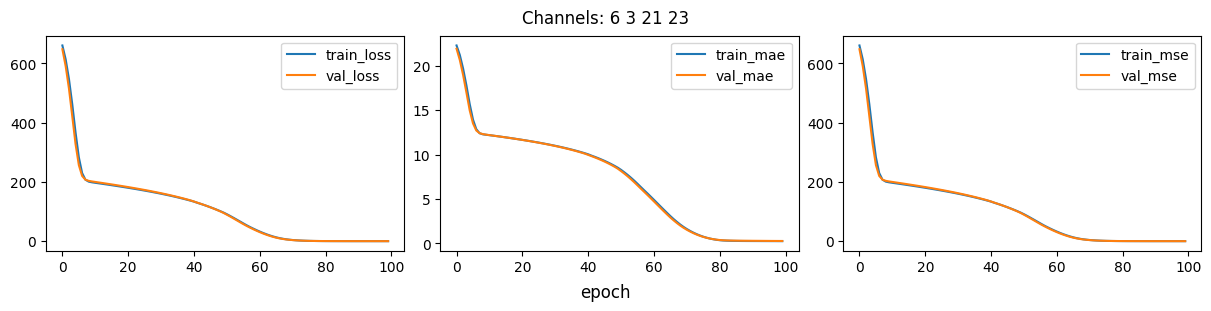

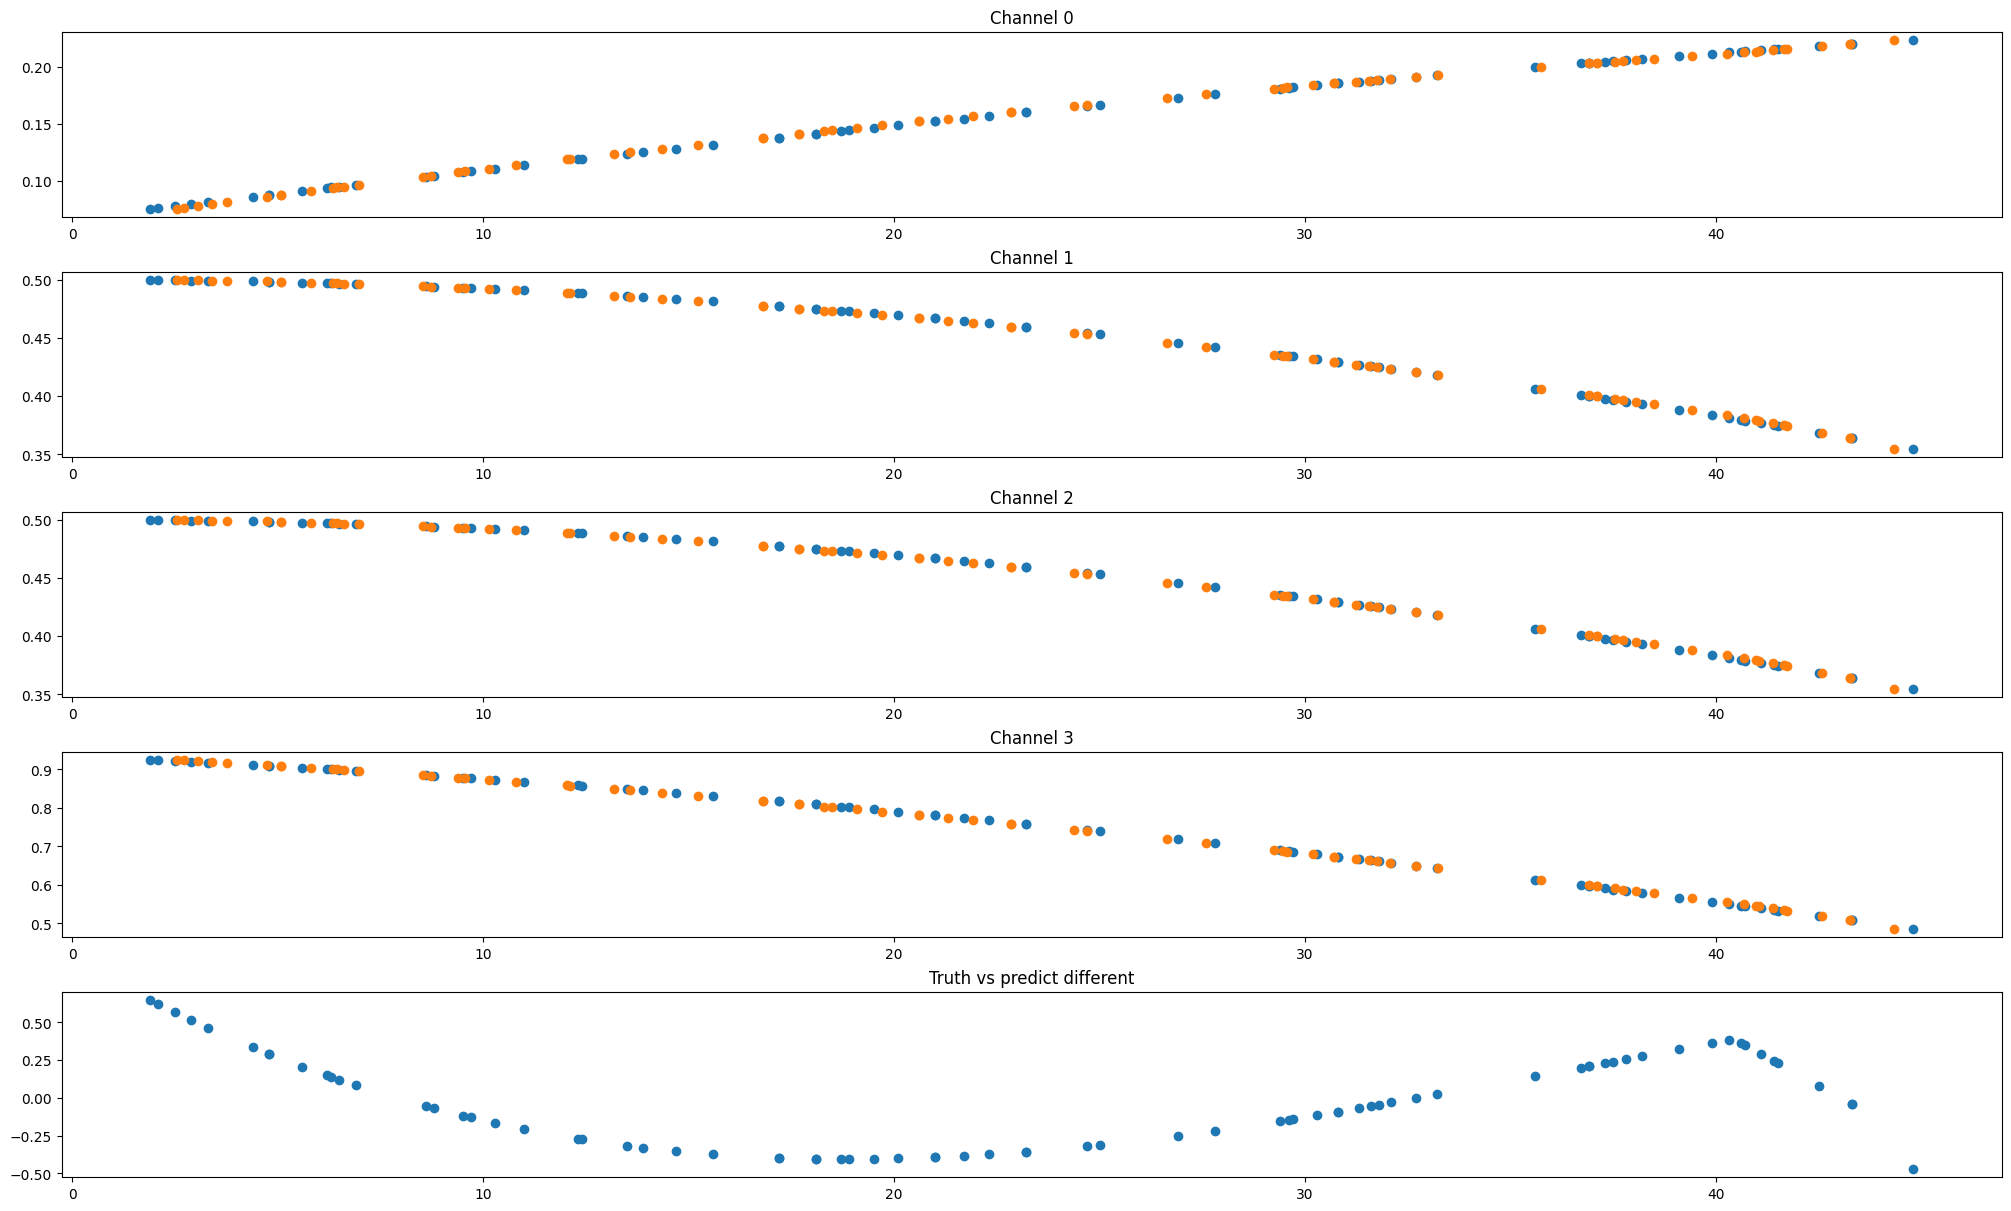

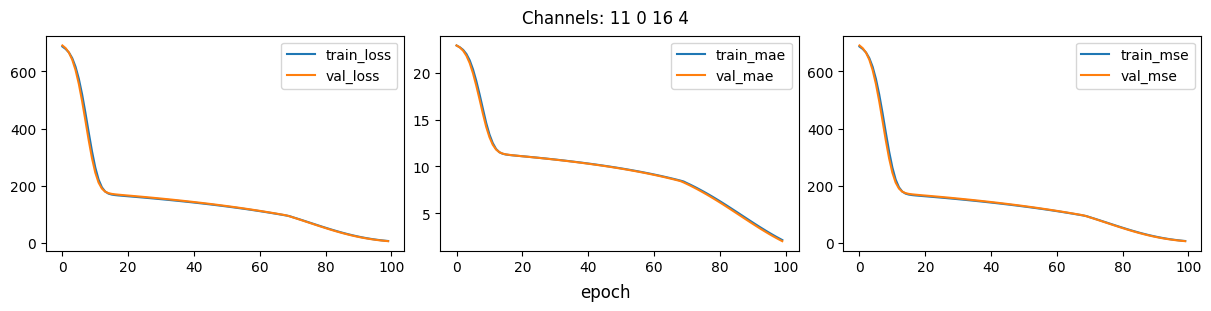

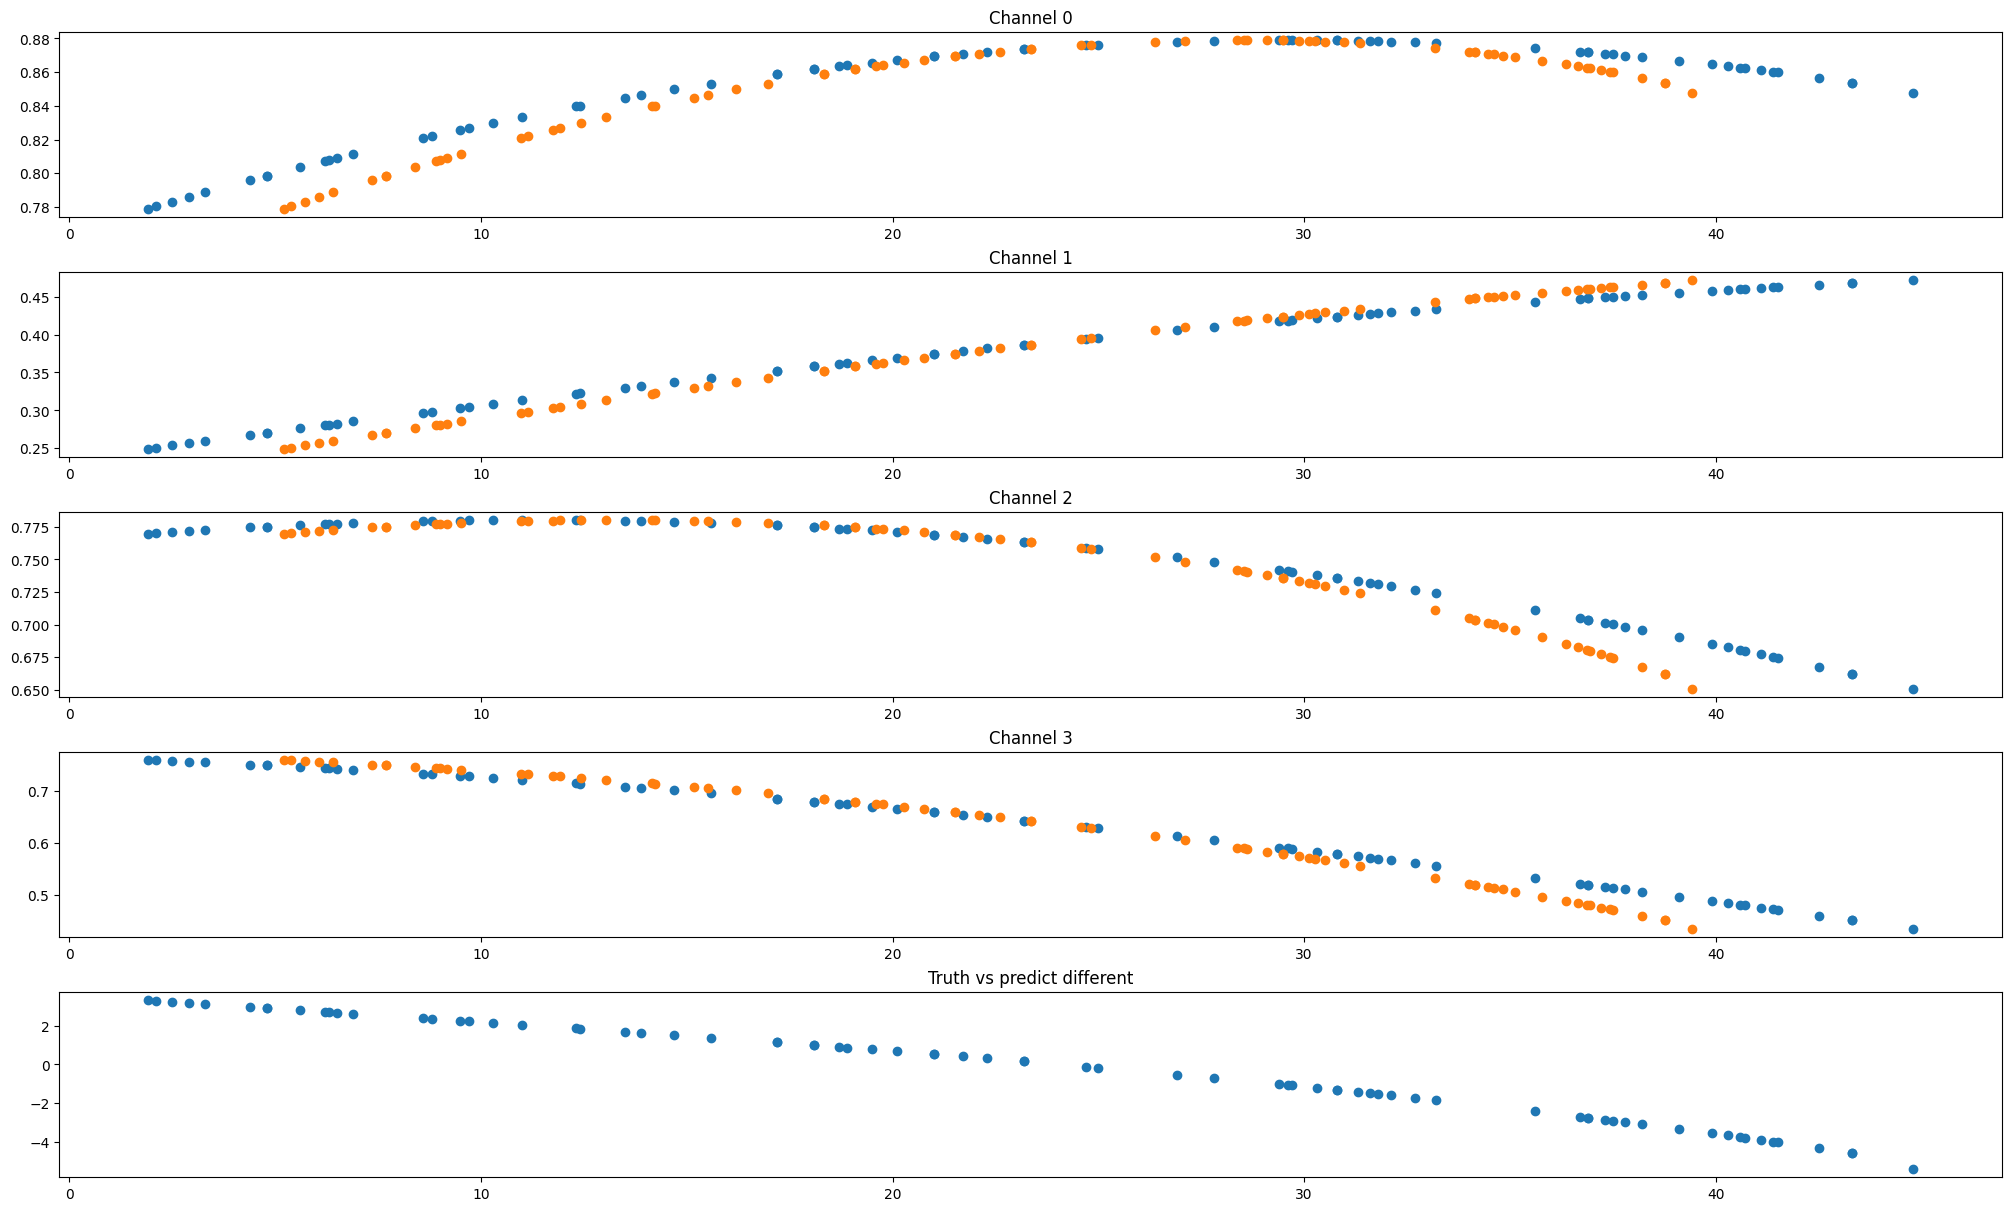

In [673]:
for channels in list_channels:
    dataset = DataSetPacker(inputs, labels, channels)
    train_dataset, val_dataset, test_dataset = dataset.split(shuffle=False)
    model = MyModel(np.shape(channels))
    model.compile(optimizer='adam', loss='mse', metrics=['mse','mae'])
    losses = model.fit(train_dataset.batch(8), epochs=100, validation_data = val_dataset.batch(8), verbose=False)
    EvaluateModel.plot_history(losses, channels)
    EvaluateModel.evaluate(model, test_dataset, True)
    EvaluateModel.plot_evaluation(model, channels, test_dataset)
    

Epoch 1/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 715.3560 - mae: 23.5130 - mse: 715.3560 - val_loss: 677.2987 - val_mae: 22.5806 - val_mse: 677.2987
Epoch 2/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 692.1710 - mae: 22.9941 - mse: 692.1710 - val_loss: 655.2993 - val_mae: 22.0989 - val_mse: 655.2993
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 659.7369 - mae: 22.2485 - mse: 659.7369 - val_loss: 620.1681 - val_mae: 21.3099 - val_mse: 620.1681
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 624.5588 - mae: 21.4337 - mse: 624.5588 - val_loss: 571.0837 - val_mae: 20.1959 - val_mse: 571.0837
Epoch 5/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 574.6794 - mae: 20.2994 - mse: 574.6794 - val_loss: 514.0030 - val_mae: 18.9393 - val_mse: 514.0030
Epoch 6/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 508.7087 - mae: 18.8297 - mse: 508.7087 - val_loss: 447.0943 - val_mae: 17.5175 - val_mse: 447.0943
Epoch 7/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/

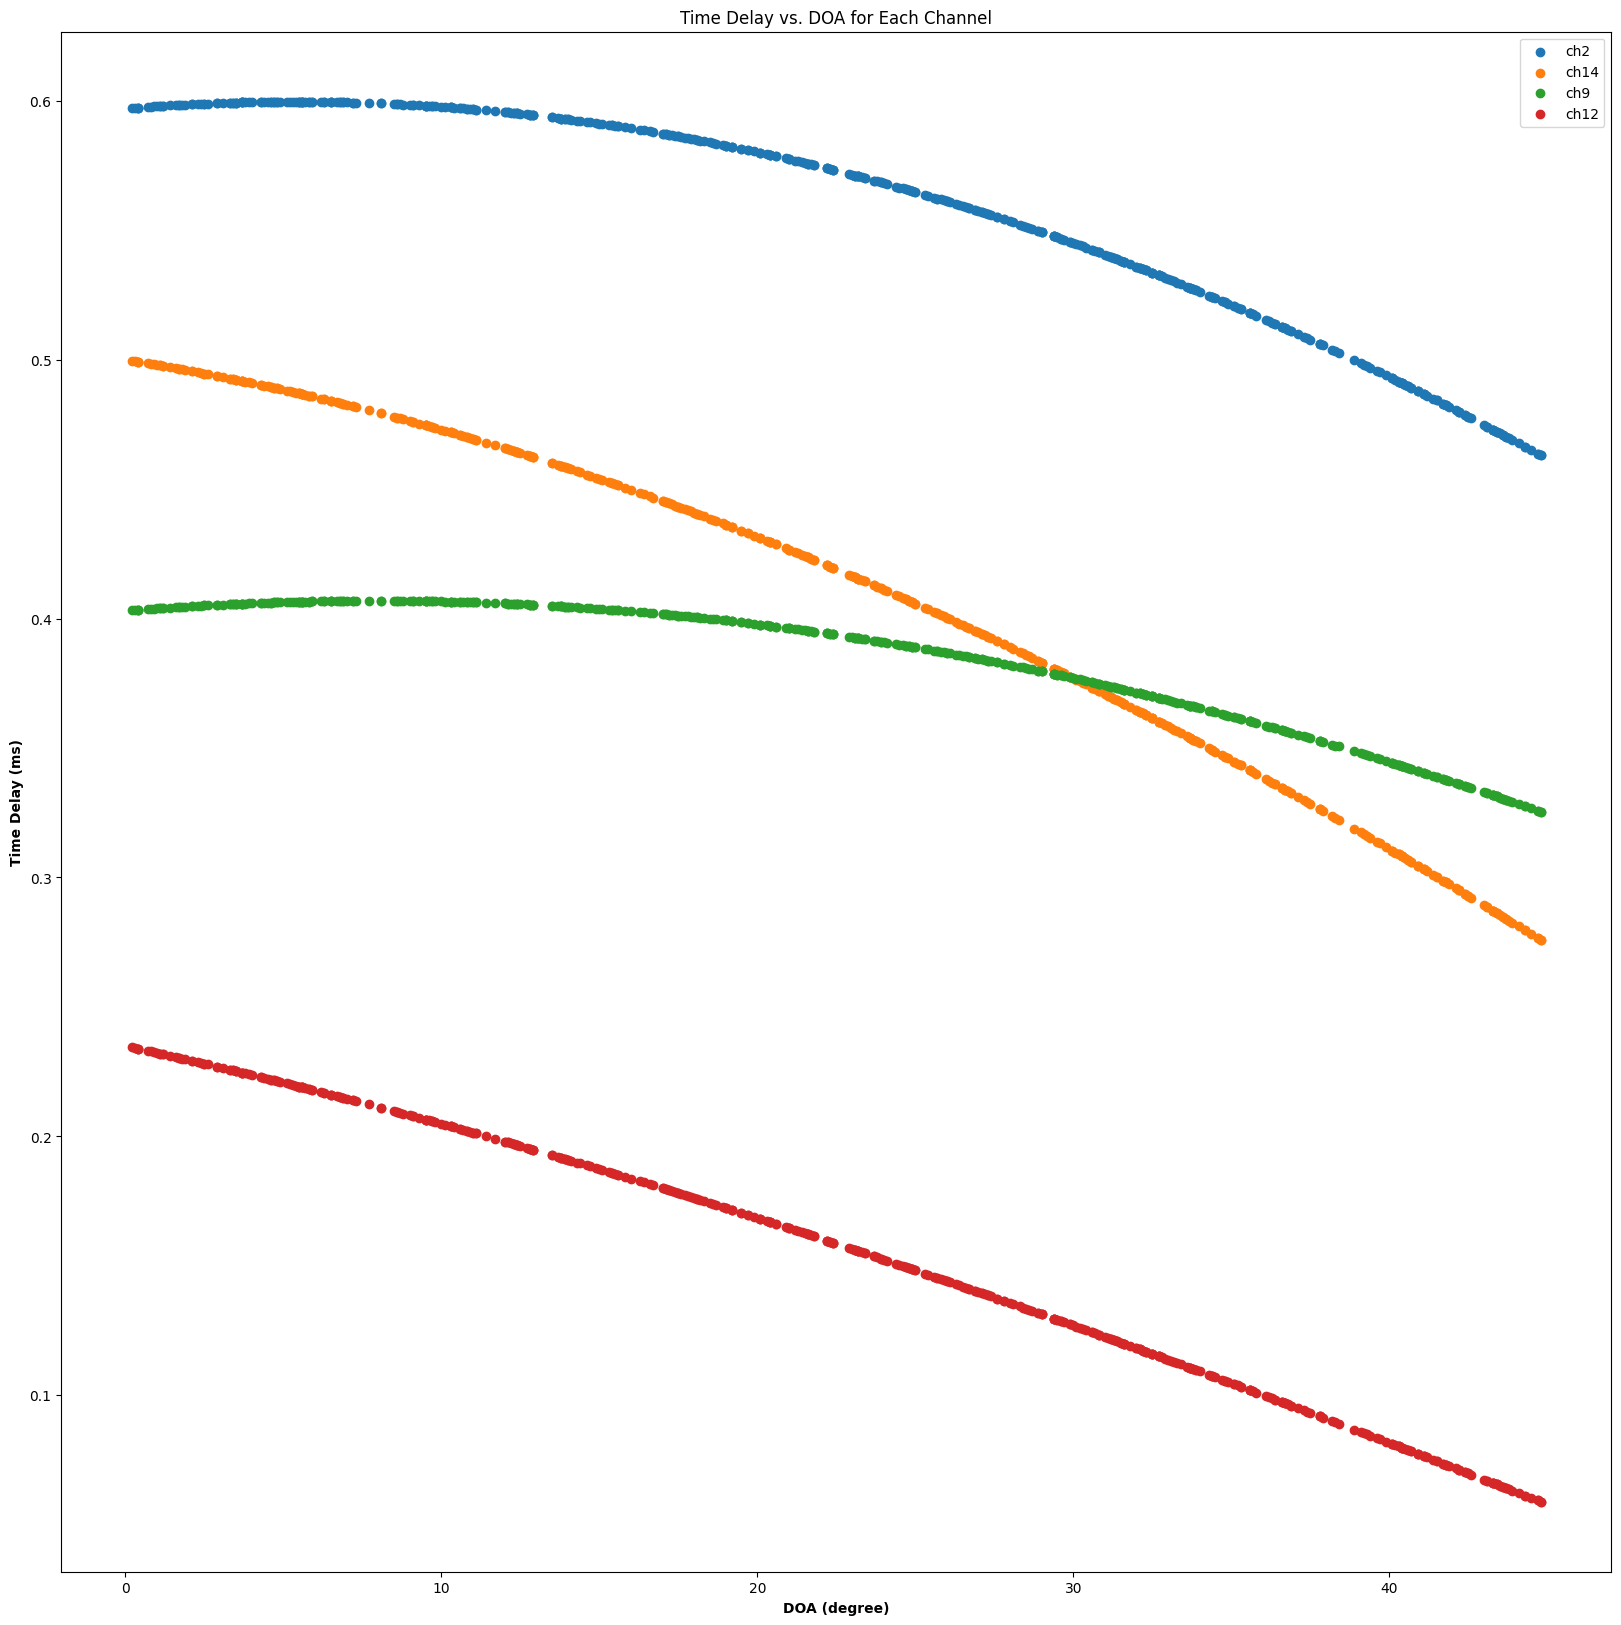

In [667]:
channel_id = [2,14,9,12]
dataset = DataSetPacker(inputs, labels, channel_id)
dataset.plot()
train_dataset, val_dataset, test_dataset = dataset.split()
model = MyModel(np.shape(channel_id))
model.compile(optimizer='adam', loss='mse', metrics=['mse','mae'])
losses = model.fit(train_dataset.batch(8), epochs=100, validation_data = val_dataset.batch(8))

[1.6295561790466309, 1.6295561790466309, 1.0532501935958862]


[1.6295561790466309, 1.6295561790466309, 1.0532501935958862]

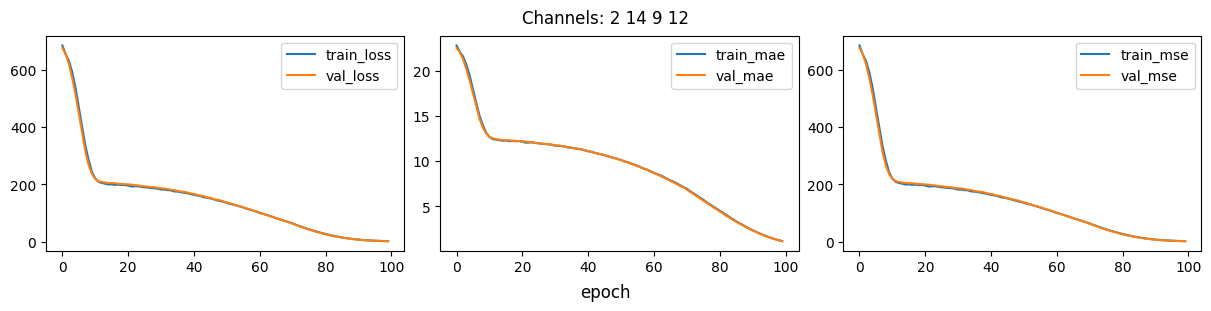

In [668]:
EvaluateModel.plot_history(losses, channel_id)
EvaluateModel.evaluate(model, test_dataset,True)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


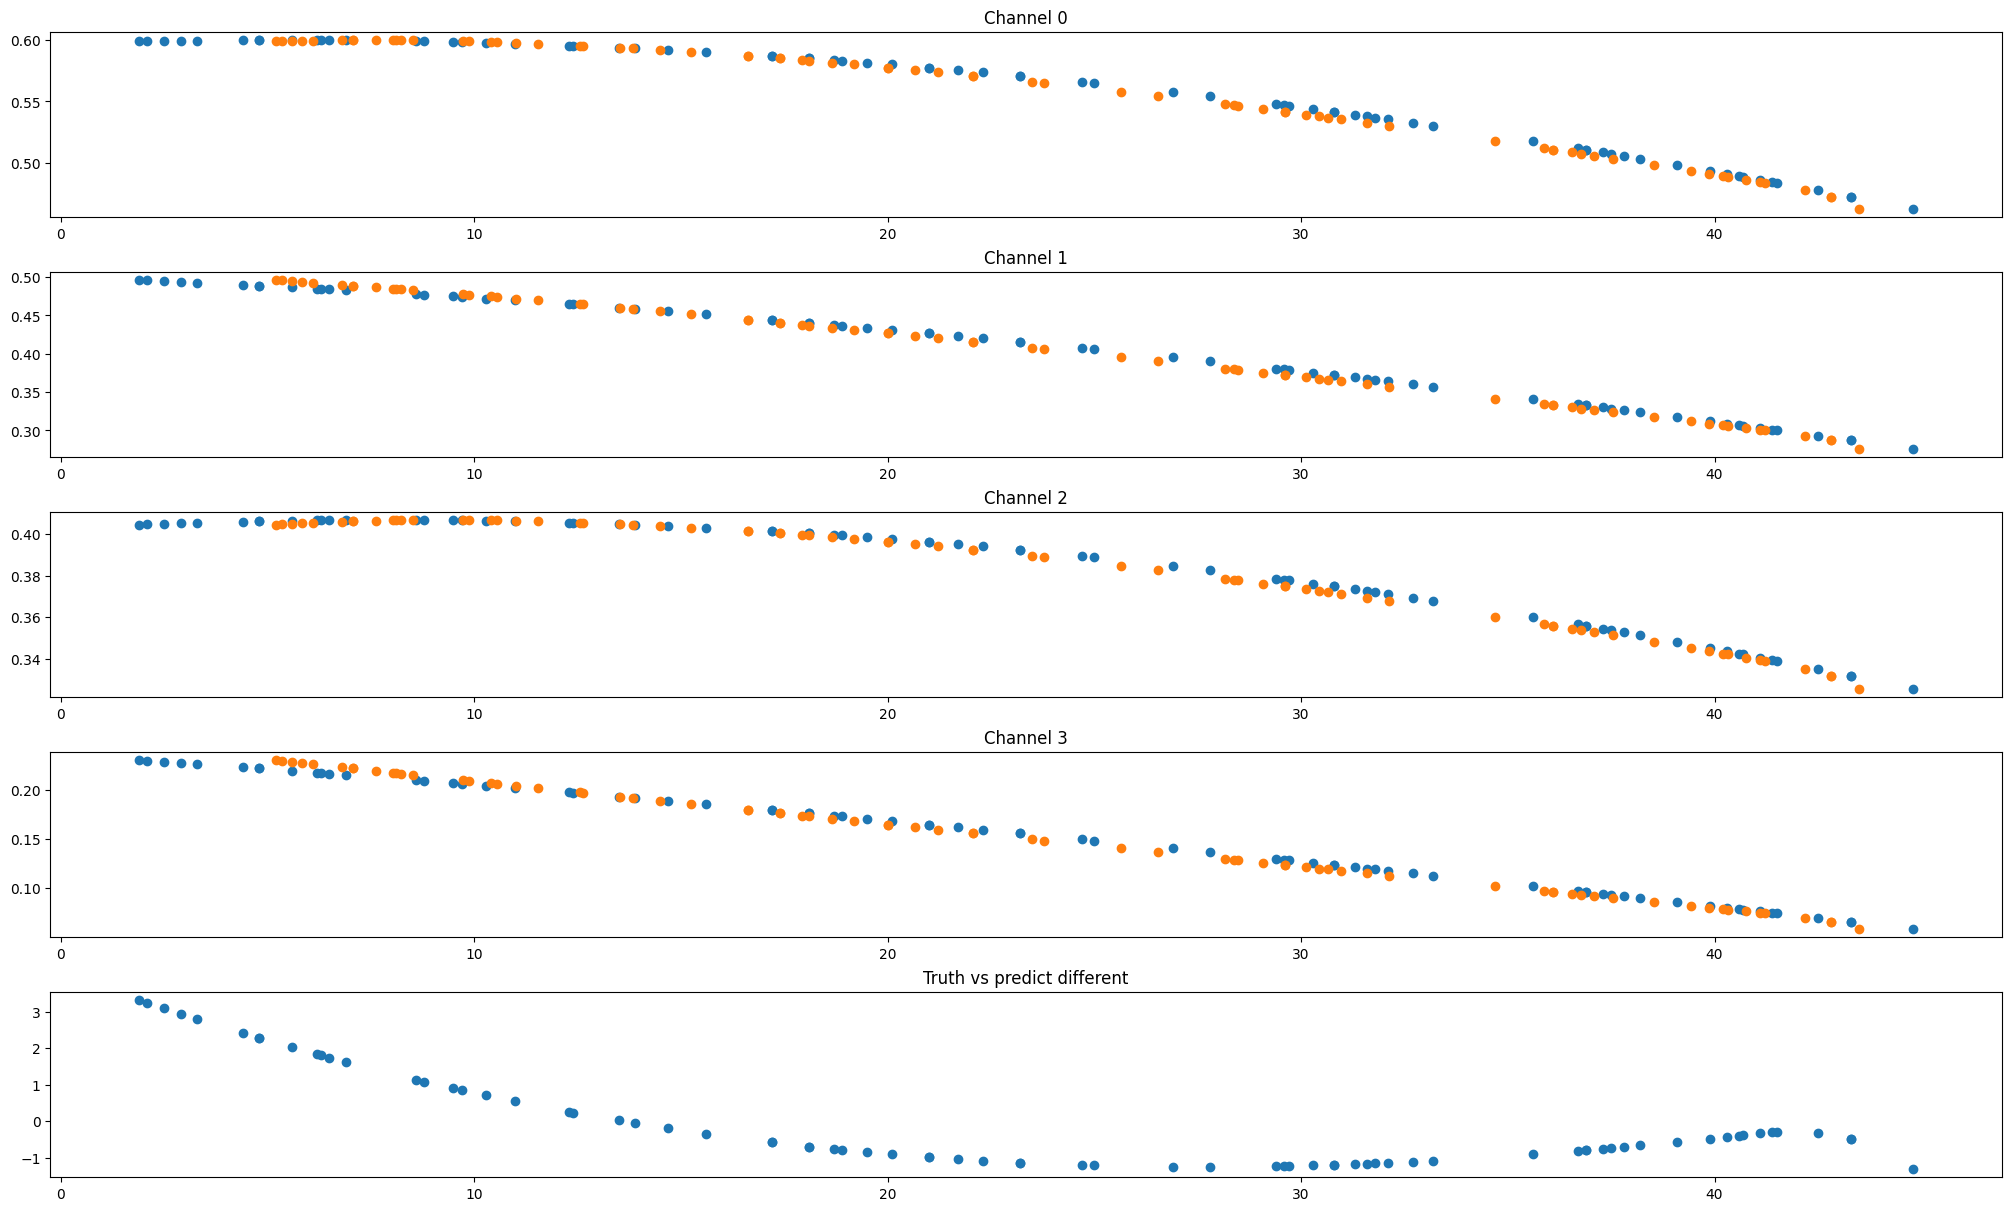

In [669]:
EvaluateModel.plot_evaluation(model, channel_id, test_dataset)

In [ ]:
x = test_dataset.take(1)

i, label=list(x.as_numpy_iterator())[0][0], list(x.as_numpy_iterator())[0][1]

i = i.reshape(-1,4)

model.predict(i), label

model.evaluate(test_dataset.batch(100))